In [1]:
!pip list

Package                           Version
--------------------------------- ------------------
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-project                  0.11.1
annotated-types                   0.6.0
anthropic                         0.45.2
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy         

In [2]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install cmake dlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install face_recognition

Note: you may need to restart the kernel to use updated packages.


In [5]:
from imutils import face_utils
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import dlib
import cv2
 
import face_recognition

In [ ]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [6]:
# face_landmark_path = 'lib/landmark/shape_predictor_68_face_landmarks.dat'
# predictor = dlib.shape_predictor(face_landmark_path)
detector = dlib.get_frontal_face_detector()
predictor = face_recognition.api.pose_predictor_68_point

In [7]:
image_path = 'image/image.jpg' 
org_image = cv2.imread(image_path) 
image = org_image.copy() 
image = imutils.resize(image, width=500) 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
 
rects = detector(gray, 1)

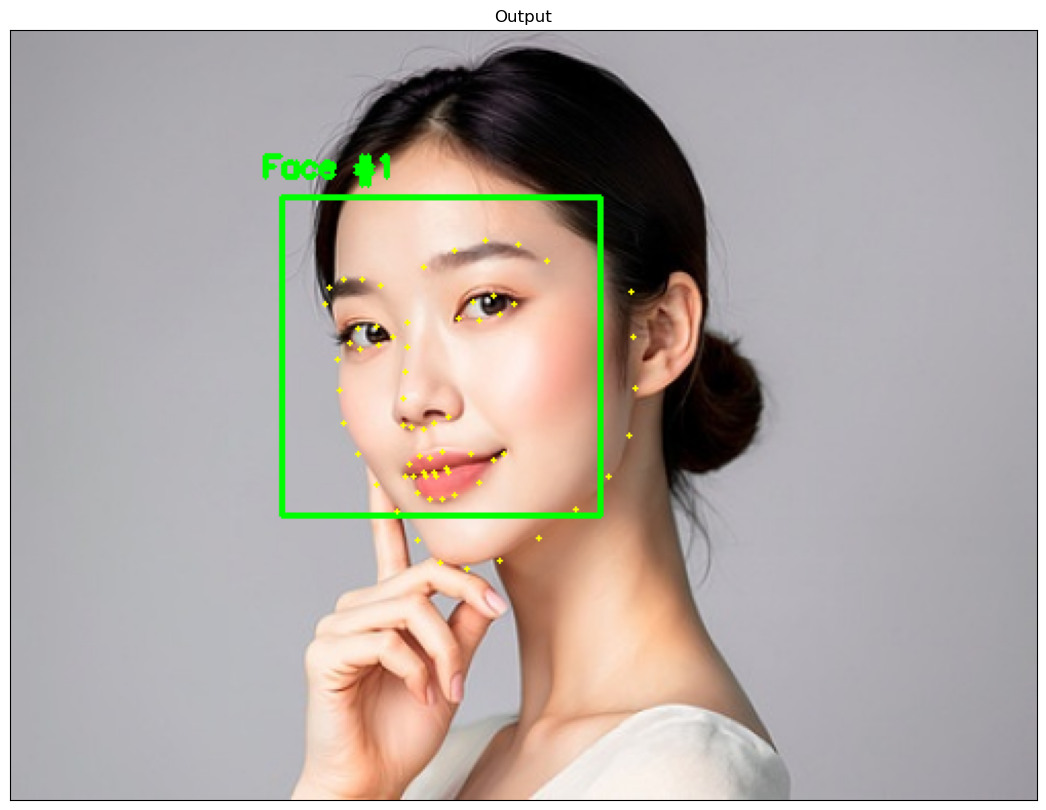

In [8]:
for (i, rect) in enumerate(rects):
    # ÏñºÍµ¥ ÏòÅÏó≠Ïùò ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨Î•º Í≤∞Ï†ïÌïú Îã§Ïùå 
    # ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨(x, y) Ï¢åÌëúÎ•º NumPy ArrayÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    
    # dlibÏùò ÏÇ¨Í∞ÅÌòïÏùÑ OpenCV bounding boxÎ°ú Î≥ÄÌôò(x, y, w, h)
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨Ïóê Ìè¨Ïù∏Ìä∏Î•º Í∑∏Î¶ΩÎãàÎã§.
    for (i, (x, y)) in enumerate(shape):
        cv2.circle(image, (x, y), 1, (0, 255, 255), -1)
        # cv2.putText(image, str(i + 1), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255, 255, 255), 1)
        
plt_imshow("Output", image, figsize=(16,10))

In [10]:
import cv2
face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('data/haarcascade_eye.xml')

In [11]:
classifier = cv2.CascadeClassifier(cv2.data.haarcascades +
                                       'haarcascade_frontalface_default.xml')

In [12]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [28]:
import cv2
# Ïπ¥Î©îÎùº Ïó∞Í≤∞ÌïòÍ∏∞
cap = cv2.VideoCapture(0)

while True:
    ret, img = cap.read()

    if not ret:
        break

    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # ÌùëÎ∞±ÏÇ¨ÏßÑÏóêÏÑú ÏñºÍµ¥Í≤ÄÏ∂ú
    # Í∞Å ÏñºÍµ¥Ïùò Ï¢åÏÉÅÎã®ÏúÑÏπò(x,y) Í∞ÄÎ°úÏÑ∏Î°úÌÅ¨Í∏∞(w,h)Î•º Î∞òÌôò
    faces = face_cascade.detectMultiScale(img_gray)
    # Í≤ÄÏ∂úÎêú ÏñºÍµ¥ ÌëúÏãúÌïòÍ∏∞
    for (x,y,w,h) in faces :
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2)
        # Í≤ÄÏ∂úÎêú ÏñºÍµ¥ÏòÅÏó≠ ÏïàÏóêÏÑú Îàà Í≤ÄÏ∂ú
        ## Í≤ÄÏ∂úÎêú ÏñºÍµ¥ ÏòÅÏó≠ ÏûêÎ•¥Í∏∞
        roi_gray = img_gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        ## ÏñºÍµ¥ ÏòÅÏó≠ÏóêÏÑú Îàà Í≤ÄÏ∂úÌïòÍ∏∞
        ## Îàà ÏòÅÏó≠Ïùò Ï¢åÏÉÅÎã®Ï¢åÌëú(x,y), ÎààÏùò Í∞ÄÎ°úÏÑ∏Î°úÌÅ¨Í∏∞(w,h) Ï∂úÎ†•
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,0,255),2)


    cv2.imshow('camera', img)

    k = cv2.waitKey(33)
    # 1Î≤à Ï¢ÖÎ£åÎ≤ÑÌäº ÎßåÎì§Í∏∞
    if k == 49:
        break
    
        
cap.release()
cv2.destroyAllWindows()
# Í∞ÄÎÅî ÎÅäÍ∏∞Îäî ÎäêÎÇåÏù¥ ÎÇòÎäî Ïù¥Ïú†
# k = cv2.waitKey(33) : Ìïú ÏÇ¨ÏßÑÏóêÏÑú 0.033Ï¥à ÎèôÏïà Î®∏Î¨¥Î•∏Îã§
# ÏñºÍµ¥ Í≤ÄÏ∂ú ÌõÑ ÎààÏùÑ Í≤ÄÏ∂úÌïòÎäî ÏãúÍ∞ÑÏù¥ Ï°∞Í∏à ÏÜåÏöî (0.01Ï¥àÎùº Í∞ÄÏ†ï)
# Ìïú ÏÇ¨ÏßÑÏóê Ìà¨ÏûêÎêòÎäî ÏãúÍ∞Ñ = 0.033 + 0.01 = 0.043Ï¥à
# 1Ï¥àÏóê ÌåêÎã®Ìï† Ïàò ÏûàÎäî ÏÇ¨ÏßÑ 23 ~ 24Ïû•

KeyboardInterrupt: 

In [30]:
import cv2
import dlib
import imutils
from imutils import face_utils

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ÏñºÍµ¥ Í∞êÏßÄ
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
        # ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ ÏòàÏ∏°
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ÏñºÍµ¥ ÏòÅÏó≠ ÌëúÏãú (Bounding Box)
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, f"Face #{i + 1}", (x - 10, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ ÌëúÏãú
        for (x, y) in shape:
            cv2.circle(frame, (x, y), 1, (0, 255, 255), -1)

    # ÌôîÎ©¥ Ï∂úÎ†•
    cv2.imshow("Real-time Face Detection", frame)

    # Ï¢ÖÎ£å Ï°∞Í±¥ (ESC ÌÇ§)
    if cv2.waitKey(1) & 0xFF == 27:
        break

# Î¶¨ÏÜåÏä§ Ìï¥Ï†ú
cap.release()
cv2.destroyAllWindows()

In [23]:
!pip install torch torchvision torchaudio

In [28]:
import torch
print(torch.__version__) 

2.6.0+cpu


In [5]:
import os
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

In [23]:
from transformers import AutoModelForImageClassification, AutoProcessor
import torch
import requests
from PIL import Image
import cv2
import io

# Î™®Îç∏ Î∞è ÌîÑÎ°úÏÑ∏ÏÑú Î°úÎìú (Hugging FaceÏóêÏÑú Í∞ÄÏ†∏Ïò§Í∏∞)
model_name = "TahaDouaji/drowsiness-detection"  # Ïó¨Í∏∞Ïóê ÏÇ¨Ïö©Ìï† Î™®Îç∏ Ïù¥Î¶Ñ ÏûÖÎ†•
model = AutoModelForImageClassification.from_pretrained(model_name)
processor = AutoProcessor.from_pretrained(model_name, use_fast=True)
response = requests.get(img_url, stream=True)

# ÌÖåÏä§Ìä∏Ïö© Ïù¥ÎØ∏ÏßÄ Îã§Ïö¥Î°úÎìú
img_url = "https://cdn.mindgil.com/news/photo/202012/70479_6111_0219.jpg"  # ÌÖåÏä§Ìä∏Ìï† Ïù¥ÎØ∏ÏßÄ URL
response = requests.get(img_url, stream=True)

if response.status_code == 200:
    img = Image.open(BytesIO(response.content)).convert("RGB")

    # 3. Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤òÎ¶¨
    inputs = processor(images=img, return_tensors="pt")

    # 4. ÏòàÏ∏° Ïã§Ìñâ
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_label = logits.argmax(-1).item()

    # 5. ImageNet 1K ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏î Í∞ÄÏ†∏Ïò§Í∏∞
    LABELS_URL = "https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt"
    labels = requests.get(LABELS_URL).text.splitlines()

    # 6. ÏòàÏ∏°Îêú ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ Ï∂úÎ†•
    predicted_label_name = labels[predicted_label]
    print(f"Predicted class: {predicted_label_name} (Index: {predicted_label})")

else:
    print(f"Ïù¥ÎØ∏ÏßÄ Îã§Ïö¥Î°úÎìú Ïã§Ìå®, ÏÉÅÌÉú ÏΩîÎìú: {response.status_code}")

OSError: TahaDouaji/drowsiness-detection is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [6]:
!git clone https://github.com/Boubker10/SafeDriveVision

Cloning into 'SafeDriveVision'...


In [7]:
import SafeDriveVision

In [8]:
!pip install --upgrade opencv-python pillow numpy

  Using cached numpy-2.2.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.3-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.3 which is incompatible.
pinecone-text 0.9.0 requires numpy<2.0,>=1.26; python_version >= "3.12", but you have numpy 2.2.3 which is incompatible.
streamlit 1.37.1 requires pillow<11,>=7.1.0, but you have pillow 11.1.0 which is incompatible.


In [11]:
import cv2
import dlib
import imutils
import numpy as np #Ï∂îÍ∞Ä
from imutils import face_utils
from scipy.spatial import distance as dist #Ï∂îÍ∞Ä
from PIL import ImageFont, ImageDraw, Image #ÌïúÍ∏Ä Ìè∞Ìä∏

# ÌïúÍ∏Ä Ìè∞Ìä∏ Í≤ΩÎ°ú ÏÑ§Ï†ï (Windows Í∏∞Ï§Ä, Îã§Î•∏ OSÎäî Î≥ÑÎèÑ Ìè∞Ìä∏ ÌïÑÏöî)
fontpath = "C:/Windows/Fonts/malgun.ttf"  # 'ÎßëÏùÄ Í≥†Îîï' Ìè∞Ìä∏ Í≤ΩÎ°ú
font = ImageFont.truetype(fontpath, 30)  # Ìè∞Ìä∏ ÌÅ¨Í∏∞ ÏÑ§Ï†ï

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """ÌïúÍ∏Ä ÌÖçÏä§Ìä∏Î•º ÌôîÎ©¥Ïóê Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")


# ÎààÍ≥º ÏûÖÏùò ÎûúÎìúÎßàÌÅ¨ Ïù∏Îç±Ïä§
(lStart, lEnd) = (42, 48)  # Ïò§Î•∏Ï™Ω Îàà
(rStart, rEnd) = (36, 42)  # ÏôºÏ™Ω Îàà
(mStart, mEnd) = (48, 68)  # ÏûÖ

# Îàà ÍπúÎπ°ÏûÑ Í∏∞Ï§ÄÍ∞í (EAR)
EYE_AR_THRESH = 0.25
EYE_AR_CONSEC_FRAMES = 30  # Î™á ÌîÑÎ†àÏûÑ Ïó∞ÏÜç Í∞êÍ≤ºÎäîÏßÄ ÌôïÏù∏
COUNTER = 0

# ÏûÖ Î≤åÎ¶º Í∏∞Ï§ÄÍ∞í (MAR)
MOUTH_AR_THRESH = 0.75  # ÌïòÌíà Í∞êÏßÄ ÏûÑÍ≥ÑÍ∞í

def eye_aspect_ratio(eye):
    """ÎààÏùò EAR (Îàà ÍπúÎπ°ÏûÑ ÎπÑÏú®)ÏùÑ Í≥ÑÏÇ∞ÌïòÎäî Ìï®Ïàò"""
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    return (A + B) / (2.0 * C)

def mouth_aspect_ratio(mouth):
    """ÏûÖÏùò MAR (ÏûÖ Î≤åÎ¶º ÎπÑÏú®)ÏùÑ Í≥ÑÏÇ∞ÌïòÎäî Ìï®Ïàò"""
    A = dist.euclidean(mouth[2], mouth[10])
    B = dist.euclidean(mouth[4], mouth[8])
    C = dist.euclidean(mouth[0], mouth[6])
    return (A + B) / (2.0 * C)

# ÌïòÌíà ÏßÄÏÜç Í∞êÏßÄÎ•º ÏúÑÌïú Ïπ¥Ïö¥Ìä∏ Î≥ÄÏàò Ï∂îÍ∞Ä
MOUTH_AR_CONSEC_FRAMES = 22.5  # 1Ï¥à ÎèôÏïà ÌïòÌíà ÏßÄÏÜç (30FPS Í∏∞Ï§Ä)
MOUTH_COUNTER = 0  # ÌïòÌíà ÏßÄÏÜç ÏãúÍ∞Ñ Ïπ¥Ïö¥Ìä∏ Î≥ÄÏàò

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ÏñºÍµ¥ Í∞êÏßÄ
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
        # ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ ÏòàÏ∏°
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ÏñºÍµ¥ ÏòÅÏó≠ ÌëúÏãú (Bounding Box)
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, f"Face #{i + 1}", (x - 10, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Îàà ÏòÅÏó≠ Í∞ÄÏ†∏Ïò§Í∏∞
        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)

        # EAR ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
        ear = (leftEAR + rightEAR) / 2.0

        # ÏûÖ ÏòÅÏó≠ Í∞ÄÏ†∏Ïò§Í∏∞
        mouth = shape[mStart:mEnd]
        mar = mouth_aspect_ratio(mouth)

        # ÌïòÌíà Í∞êÏßÄ - ÏùºÏ†ï ÏãúÍ∞Ñ Ïú†ÏßÄÎêòÏñ¥Ïïº Ï°∏ÏùåÏúºÎ°ú ÌåêÎã®
        if mar > MOUTH_AR_THRESH:
            MOUTH_COUNTER += 1  # ÌïòÌíà ÏßÄÏÜç ÏãúÍ∞Ñ Ï¶ùÍ∞Ä
            if MOUTH_COUNTER >= MOUTH_AR_CONSEC_FRAMES:
                frame = put_text_korean(frame, "Ï°∏Ïùå Í∞êÏßÄÎê®! (ÌïòÌíà Ïú†ÏßÄ)", (10, 90), (0, 0, 255))
        else:
            MOUTH_COUNTER = 0  # ÌïòÌíàÏù¥ Î©àÏ∂îÎ©¥ Ïπ¥Ïö¥ÌÑ∞ Ï¥àÍ∏∞Ìôî

        # ÎààÏù¥ Í∞êÍ∏¥ Í≤ΩÏö∞ Í∞êÏßÄ
        if ear < EYE_AR_THRESH:
            COUNTER += 1
            if COUNTER >= EYE_AR_CONSEC_FRAMES:
                frame = put_text_korean(frame, "Ï°∏Ïùå Í∞êÏßÄÎê®!", (10, 30), (0, 0, 255))
        else:
            COUNTER = 0

        # ÌïòÌíà Í∞êÏßÄ (ÏûÖÏù¥ ÌÅ¨Í≤å Î≤åÏñ¥Ï°åÏùÑ Îïå)
        if mar > MOUTH_AR_THRESH:
            frame = put_text_korean(frame, "ÌïòÌíà Í∞êÏßÄÎê®!", (10, 60), (0, 0, 255))

        # ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ ÌëúÏãú
        for (x, y) in shape:
            cv2.circle(frame, (x, y), 1, (0, 255, 255), -1)

    # ÌôîÎ©¥ Ï∂úÎ†•
    cv2.imshow("Real-time Face Detection", frame)

    # Ï¢ÖÎ£å Ï°∞Í±¥ (ESC ÌÇ§)
    if cv2.waitKey(1) & 0xFF == 27:
        break

# Î¶¨ÏÜåÏä§ Ìï¥Ï†ú
cap.release()
cv2.destroyAllWindows()

In [ ]:
!pip uninstall numpy

In [ ]:
np.__version__

'1.26.4'

In [ ]:
!pip install pygame

In [27]:
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from scipy.spatial import distance as dist
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """ÌïúÍ∏Ä ÌÖçÏä§Ìä∏Î•º ÌôîÎ©¥Ïóê Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# ÏñºÍµ¥ Í∞êÏßÄÍ∏∞ Î∞è ÎûúÎìúÎßàÌÅ¨ ÏòàÏ∏°Í∏∞ Î°úÎìú
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# ÎààÍ≥º ÏûÖÏùò ÎûúÎìúÎßàÌÅ¨ Ïù∏Îç±Ïä§
(lStart, lEnd) = (42, 48)  # Ïò§Î•∏Ï™Ω Îàà
(rStart, rEnd) = (36, 42)  # ÏôºÏ™Ω Îàà
(mStart, mEnd) = (48, 68)  # ÏûÖ

# Ï°∏Ïùå Í∞êÏßÄ Í¥ÄÎ†® Î≥ÄÏàò
EYE_CLOSED_TIME = 0  # Îàà Í∞êÍ≥† ÏûàÎäî ÎàÑÏ†Å ÏãúÍ∞Ñ (Ï¥à)
SLEEPY_WARNING_ACTIVE = False  # Ï°∏Ïùå Í≤ΩÍ≥† ÌôúÏÑ± Ïó¨Î∂Ä
LAST_DROWSY_TIME = None  # ÎßàÏßÄÎßâ Ï°∏Ïùå ÏÉÅÌÉú Í∏∞Î°ù
LAST_WARNING_TIME = None  # ÎßàÏßÄÎßâ Í≤ΩÍ≥† ÏÉÅÌÉú Í∏∞Î°ù
DROWSY_DISPLAY_TIME = 3  # Ï£ºÏùò ÏÉÅÌÉú ÌëúÏãú ÏãúÍ∞Ñ (Îàà Îñ†ÎèÑ Ïú†ÏßÄ)
WARNING_DISPLAY_TIME = 60  # Í≤ΩÍ≥† ÏÉÅÌÉú ÌëúÏãú ÏãúÍ∞Ñ (1Î∂ÑÍ∞Ñ Ïú†ÏßÄ)

# Ï°∏Ïùå Í∞êÏßÄ Îã®Í≥Ñ Î≥ÄÏàò
DROWSY_WARNING_COUNT = 0  # Ï°∏Ïùå Ï£ºÏùò Îã®Í≥Ñ Î∞úÏÉù ÌöüÏàò
DROWSY_ALERT_FRAMES = 0  # Ï°∏Ïùå Í≤ΩÍ≥† Ïú†ÏßÄ ÏãúÍ∞Ñ (ÌîÑÎ†àÏûÑ Îã®ÏúÑ)
DROWSY_ALERT_DURATION = 90  # Í≤ΩÍ≥† ÏÉÅÌÉú Ïú†ÏßÄ (3Ï¥à)
EYE_CLOSED_WARNING = 1  # 1Ï¥à Ïù¥ÏÉÅ Îàà Í∞êÏùÄ ÏÉÅÌÉú Ïú†ÏßÄ (Ï£ºÏùò)
EYE_CLOSED_DANGER = 2  # 2Ï¥à Ïù¥ÏÉÅ Îàà Í∞êÏùÄ ÏÉÅÌÉú Ïú†ÏßÄ (Í≤ΩÍ≥†)

# Ï°∏Ïùå Í∞êÏßÄ Í∏∞Ï§Ä
EYE_AR_THRESH = 0.2  # Îàà Í∞êÏùÄ ÏÉÅÌÉú Í∏∞Ï§Ä
EYE_AR_CONSEC_FRAMES = 30  # 1Ï¥à Ïù¥ÏÉÅ Îàà Í∞êÏùå Ïú†ÏßÄ (30FPS Í∏∞Ï§Ä)
MOUTH_AR_THRESH = 0.75  # ÌïòÌíà Í∏∞Ï§Ä
MOUTH_AR_CONSEC_FRAMES = 30  # 1Ï¥à ÎèôÏïà ÌïòÌíà Ïú†ÏßÄ
EYE_BLINK_MIN = 12  # 1Î∂Ñ Í∏∞Ï§Ä Îàà ÍπúÎπ°ÏûÑ ÌöüÏàò (ÏµúÏÜå)
EYE_BLINK_MAX = 22  # 1Î∂Ñ Í∏∞Ï§Ä Îàà ÍπúÎπ°ÏûÑ ÌöüÏàò (ÏµúÎåÄ)
YAWN_THRESH = 2  # 1Î∂Ñ Í∏∞Ï§Ä ÌïòÌíà ÌöüÏàò
YAWN_THRESH_DANGER = 3  # 1Î∂Ñ Í∏∞Ï§Ä ÌïòÌíà 3Ìöå (Í≤ΩÍ≥†)

# üö® Í≤ΩÍ≥† Î¨∏Íµ¨ Ïú†ÏßÄ ÌîÑÎ†àÏûÑ ÏÑ§Ï†ï (60ÌîÑÎ†àÏûÑ = ÏïΩ 2Ï¥à)
ALERT_DISPLAY_FRAMES = 0
ALERT_DURATION = 60  # 60ÌîÑÎ†àÏûÑ ÎèôÏïà Ïú†ÏßÄ (2Ï¥à)

# Ï£ºÏùò Î∂ÑÏÇ∞ Í∏∞Ï§Ä
GAZE_TIME_THRESH = 2  # ÏãúÏÑ† Ïù¥ÌÉà ÏãúÍ∞Ñ (Ï¥à)
GAZE_COUNT_THRESH = 2  # ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò
HEAD_ANGLE_THRESH_X = 45  # Ï¢åÏö∞ Í∞ÅÎèÑ Í∏∞Ï§Ä
HEAD_ANGLE_THRESH_Y = 20  # ÏÉÅÌïò Í∞ÅÎèÑ Í∏∞Ï§Ä
GAZE_COUNT_THRESH_WARNING = 2  # Ï£ºÏùò Îã®Í≥Ñ (1Îã®Í≥Ñ)
GAZE_COUNT_THRESH_DANGER = 5  # Í≤ΩÍ≥† Îã®Í≥Ñ (2Îã®Í≥Ñ)

# Ïπ¥Ïö¥Ìä∏ Î≥ÄÏàò
EYE_COUNTER = 0  # Îàà Í∞êÏùÄ ÏãúÍ∞Ñ Ïπ¥Ïö¥Ìä∏
MOUTH_COUNTER = 0  # ÌïòÌíà ÏßÄÏÜç Ïπ¥Ïö¥Ìä∏
BLINK_COUNTER = 0  # Îàà ÍπúÎπ°ÏûÑ ÌöüÏàò (1Î∂Ñ ÎÇ¥)
BLINK_COUNT = 0
YAWN_COUNTER = 0  # ÌïòÌíà ÌöüÏàò (1Î∂Ñ ÎÇ¥)
GAZE_COUNTER = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÏãúÍ∞Ñ Ïπ¥Ïö¥Ìä∏
GAZE_COUNT = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò
GAZE_RESET_TIME = time.time()  # 1Î∂Ñ Í∏∞Ï§ÄÏúºÎ°ú Ï¥àÍ∏∞Ìôî
RESET_TIME = time.time()  # 1Î∂Ñ Í∏∞Ï§Ä Ï¥àÍ∏∞Ìôî ÏãúÍ∞Ñ

# üöÄ Í≤ΩÍ≥† Î∞è Ï£ºÏùò ÏÉÅÌÉú Î≥ÄÏàò Ï∂îÍ∞Ä
DROWSY_WARNING_ACTIVE = False  # ‚ö†Ô∏è Ï°∏Ïùå Ï£ºÏùò ÏÉÅÌÉú Ïó¨Î∂Ä
SLEEPY_WARNING_ACTIVE = False  # üö® Ï°∏Ïùå Í≤ΩÍ≥† ÏÉÅÌÉú Ïó¨Î∂Ä

# ‚úÖ Î≥ÄÏàò Ï¥àÍ∏∞Ìôî Ï∂îÍ∞Ä (NameError Î∞©ÏßÄ)
LAST_YAWN_TIME = 0  # ÎßàÏßÄÎßâ ÌïòÌíà Í∞êÏßÄ ÏãúÍ∞Ñ Ï¥àÍ∏∞Ìôî
YAWN_DISPLAY_TIME = 3  # ÌïòÌíà Î¨∏Íµ¨ Ïú†ÏßÄ ÏãúÍ∞Ñ (Ï¥à)


# Í≤ΩÍ≥†Ïùå ÏÑ§Ï†ï
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"  # Í≤ΩÍ≥†Ïùå ÌååÏùº ÌïÑÏöî

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("‚ö†Ô∏è Í≤ΩÍ≥†Ïùå ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")


def eye_aspect_ratio(eye):
    """ÎààÏùò EAR(Îàà Í∞êÍπÄ ÎπÑÏú®) Í≥ÑÏÇ∞"""
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    return (A + B) / (2.0 * C)

def mouth_aspect_ratio(mouth):
    """ÏûÖÏùò MAR(ÏûÖ Î≤åÎ¶º ÎπÑÏú®) Í≥ÑÏÇ∞"""
    A = dist.euclidean(mouth[2], mouth[10])
    B = dist.euclidean(mouth[4], mouth[8])
    C = dist.euclidean(mouth[0], mouth[6])
    return (A + B) / (2.0 * C)
    

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞ Ï°∞Ï†ï
    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ÏñºÍµ¥ Í∞êÏßÄ
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
        # ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ ÏòàÏ∏°
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ‚úÖ **Î∞îÏö¥Îî© Î∞ïÏä§ (Ï¥àÎ°ùÏÉâ)**
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, f"Face #{i + 1}", (x - 10, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # ‚úÖ **ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ Ï†ê (ÎÖ∏ÎûÄÏÉâ)**
        for (x, y) in shape:
            cv2.circle(frame, (x, y), 1, (0, 255, 255), -1)

        # Îàà ÏòÅÏó≠
        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]
        leftEAR = dist.euclidean(leftEye[1], leftEye[5]) / dist.euclidean(leftEye[0], leftEye[3])
        rightEAR = dist.euclidean(rightEye[1], rightEye[5]) / dist.euclidean(rightEye[0], rightEye[3])

        # ÏûÖ ÏòÅÏó≠
        mouth = shape[mStart:mEnd]
        mar = dist.euclidean(mouth[2], mouth[10]) / dist.euclidean(mouth[0], mouth[6])

        # EAR & MAR Í≥ÑÏÇ∞
        ear = (leftEAR + rightEAR) / 2.0
        mar = mouth_aspect_ratio(mouth)

        # ‚úÖ **Ï°∏Ïùå Í∞êÏßÄ (Îàà Í∞êÏùå)**
        if ear < EYE_AR_THRESH:
            EYE_CLOSED_TIME += 1 / 30  # 30FPS Í∏∞Ï§ÄÏúºÎ°ú Ï¥à Îã®ÏúÑ Í≥ÑÏÇ∞
            
            # ‚úÖ **Ï°∏Ïùå Ï£ºÏùò Îã®Í≥Ñ Í∞êÏßÄ (Îàà Í∞êÏùÄ ÏãúÍ∞Ñ 1Ï¥à Ïù¥ÏÉÅ)**
            if EYE_CLOSED_TIME >= 1 and not SLEEPY_WARNING_ACTIVE:
                frame = put_text_korean(frame, "‚ö†Ô∏è Ï°∏Ïùå Ï£ºÏùò!", (10, 60), (0, 255, 255))  # ÎÖ∏ÎûÄÏÉâ
                LAST_DROWSY_TIME = time.time()  # ÎßàÏßÄÎßâ Ï°∏Ïùå Í∞êÏßÄ ÏãúÍ∞Ñ ÏóÖÎç∞Ïù¥Ìä∏

            # ‚úÖ **Ï°∏Ïùå Í≤ΩÍ≥† Îã®Í≥Ñ Í∞êÏßÄ (Îàà Í∞êÏùÄ ÏãúÍ∞Ñ 2Ï¥à Ïù¥ÏÉÅ)**
            if EYE_CLOSED_TIME >= 2:
                frame = put_text_korean(frame, "üö® Ï°∏Ïùå Í≤ΩÍ≥†! Ïö¥Ï†Ñ Ï§ëÏßÄ ÌïÑÏöî!", (10, 90), (0, 0, 255))
                pygame.mixer.music.play()
                SLEEPY_WARNING_ACTIVE = True  # Í≤ΩÍ≥† ÌôúÏÑ±Ìôî
                LAST_WARNING_TIME = time.time()  # ÎßàÏßÄÎßâ Í≤ΩÍ≥† Í∞êÏßÄ ÏãúÍ∞Ñ ÏóÖÎç∞Ïù¥Ìä∏

        else:
            # ‚úÖ **ÎààÏùÑ Îñ¥ÏùÑ Îïå "Ï°∏Ïùå Ï£ºÏùò" ÏÉÅÌÉú ÏùºÏ†ï ÏãúÍ∞Ñ Ïú†ÏßÄ**
            if LAST_DROWSY_TIME and time.time() - LAST_DROWSY_TIME < DROWSY_DISPLAY_TIME:
                frame = put_text_korean(frame, "‚ö†Ô∏è Ï°∏Ïùå Ï£ºÏùò!", (10, 60), (0, 255, 255))

            # ‚úÖ **ÎààÏùÑ Îñ¥ÏùÑ Îïå "Ï°∏Ïùå Í≤ΩÍ≥†" ÏÉÅÌÉú ÏùºÏ†ï ÏãúÍ∞Ñ Ïú†ÏßÄ**
            if LAST_WARNING_TIME and time.time() - LAST_WARNING_TIME < WARNING_DISPLAY_TIME:
                frame = put_text_korean(frame, "üö® Ï°∏Ïùå Í≤ΩÍ≥†! ÎààÏùÑ Îú®ÏÑ∏Ïöî!", (10, 90), (0, 0, 255))
            else:
                SLEEPY_WARNING_ACTIVE = False  # 1Î∂ÑÏù¥ ÏßÄÎÇòÎ©¥ Í≤ΩÍ≥† Ìï¥Ï†ú

            # ‚úÖ **ÎààÏùÑ Îú¨ ÌõÑ, Í≤ΩÍ≥† ÏÉÅÌÉúÍ∞Ä ÏïÑÎãàÎùºÎ©¥ Ïπ¥Ïö¥Ìä∏ Ï¥àÍ∏∞Ìôî**
            if not SLEEPY_WARNING_ACTIVE:
                EYE_CLOSED_TIME = 0


        # ‚úÖ **Ï°∏Ïùå Í∞êÏßÄ (Îàà Í∞êÏùå)**
            if EYE_CLOSED_TIME >= 2:  # üö® Ï°∏Ïùå Í≤ΩÍ≥† Ï°∞Í±¥
                frame = put_text_korean(frame, "üö® Ï°∏Ïùå Í≤ΩÍ≥†! Ïö¥Ï†Ñ Ï§ëÏßÄ ÌïÑÏöî!", (10, 90), (0, 0, 255))
                pygame.mixer.music.play()
                SLEEPY_WARNING_ACTIVE = True
                LAST_WARNING_TIME = time.time()
            
            elif EYE_CLOSED_TIME >= 1 and not SLEEPY_WARNING_ACTIVE:  # ‚ö†Ô∏è Ï°∏Ïùå Ï£ºÏùò Ï°∞Í±¥
                frame = put_text_korean(frame, "‚ö†Ô∏è Ï°∏Ïùå Ï£ºÏùò!", (10, 60), (0, 255, 255))
                LAST_DROWSY_TIME = time.time()
            
            # ‚úÖ ÎààÏùÑ Îñ¥ÏùÑ Îïå, Í≤ΩÍ≥† ÏÉÅÌÉú Ïú†ÏßÄ (Ï§ëÎ≥µ Ï†úÍ±∞!)
            if LAST_WARNING_TIME and time.time() - LAST_WARNING_TIME < WARNING_DISPLAY_TIME:
                frame = put_text_korean(frame, "üö® Ï°∏Ïùå Í≤ΩÍ≥† Ïú†ÏßÄ Ï§ë...", (10, 90), (0, 0, 255))
            elif LAST_DROWSY_TIME and time.time() - LAST_DROWSY_TIME < DROWSY_DISPLAY_TIME:
                frame = put_text_korean(frame, "‚ö†Ô∏è Ï°∏Ïùå Ï£ºÏùò Ïú†ÏßÄ Ï§ë...", (10, 60), (0, 255, 255))
            else:
                SLEEPY_WARNING_ACTIVE = False  # ÏùºÏ†ï ÏãúÍ∞ÑÏù¥ ÏßÄÎÇòÎ©¥ Ìï¥Ï†ú
                EYE_CLOSED_TIME = 0  # ‚úÖ ÎààÏùÑ Îñ¥ÏúºÎØÄÎ°ú Ïπ¥Ïö¥Ìä∏ Ï¥àÍ∏∞Ìôî


        # ‚úÖ **ÌïòÌíà Í∞êÏßÄ**
        if mar > MOUTH_AR_THRESH:  
            MOUTH_COUNTER += 1 # ÌïòÌíà ÏßÄÏÜç Ïπ¥Ïö¥Ìä∏ Ï¶ùÍ∞Ä
            if MOUTH_COUNTER >= MOUTH_AR_CONSEC_FRAMES and (time.time() - LAST_YAWN_TIME > 1):  
                YAWN_COUNTER += 1  # ‚úÖ ÌïòÌíà ÌöüÏàò Ï¶ùÍ∞Ä  
                frame = put_text_korean(frame, f"ÌïòÌíà Í∞êÏßÄÎê®! (Ï¥ù {YAWN_COUNTER}Ìöå)", (10, 100), (0, 0, 255))  
                pygame.mixer.music.play()  
                LAST_YAWN_TIME = time.time()  
                MOUTH_COUNTER = 0  
        else:
            if LAST_YAWN_TIME and time.time() - LAST_YAWN_TIME < YAWN_DISPLAY_TIME:
                frame = put_text_korean(frame, f"ÌïòÌíà Í∞êÏßÄÎê®! (Ï¥ù {YAWN_COUNTER}Ìöå)", (10, 100), (0, 0, 255))  
                MOUTH_COUNTER = 0
            MOUTH_COUNTER = 0  
        
        # ‚úÖ **1Î∂ÑÎßàÎã§ ÌïòÌíà ÌöüÏàò Ï¥àÍ∏∞Ìôî (Ï°∏Ïùå ÌåêÎã® Í∏∞Ï§Ä Ïú†ÏßÄ)**
        if time.time() - RESET_TIME >= 60:  
            YAWN_COUNTER = 0  # ÌïòÌíà ÌöüÏàò Ï¥àÍ∏∞Ìôî  
            RESET_TIME = time.time()

        print(f"BLINK_COUNT: {BLINK_COUNTER}, YAWN_COUNT: {YAWN_COUNTER}, EYE_CLOSED: {EYE_COUNTER}")

        
        # ‚úÖ Ïã§ÏãúÍ∞Ñ Îàà ÍπúÎπ°ÏûÑ & ÌïòÌíà ÌöüÏàò ÌëúÏãú
        display_text = f"Îàà ÍπúÎπ°ÏûÑ: {BLINK_COUNTER}Ìöå  |  ÌïòÌíà: {YAWN_COUNTER}Ìöå"
        frame = put_text_korean(frame, display_text, (10, 30), (255, 255, 255))  
        
        # ‚úÖ Îàà ÍπúÎπ°ÏûÑ Í∞êÏßÄ
        if ear < EYE_AR_THRESH:
            EYE_COUNTER += 1
        else:
            if EYE_COUNTER > 0:  # Îàà Í∞êÏïòÎã§Í∞Ä Îñ¥ÏùÑ Îïå Ïπ¥Ïö¥Ìä∏ Ï¶ùÍ∞Ä
                BLINK_COUNTER += 1  
            EYE_COUNTER = 0  # Ï¥àÍ∏∞Ìôî
        
        # ‚úÖ ÌïòÌíà Í∞êÏßÄ
        if mar > MOUTH_AR_THRESH:  
            MOUTH_COUNTER += 1  # ÌïòÌíà ÏßÄÏÜç Ïπ¥Ïö¥Ìä∏ Ï¶ùÍ∞Ä
            if MOUTH_COUNTER >= MOUTH_AR_CONSEC_FRAMES and (time.time() - LAST_YAWN_TIME > 1):  
                YAWN_COUNTER += 1  # ‚úÖ ÌïòÌíà ÌöüÏàò Ï¶ùÍ∞Ä  
                frame = put_text_korean(frame, f"ÌïòÌíà Í∞êÏßÄÎê®! (Ï¥ù {YAWN_COUNTER}Ìöå)", (10, 100), (0, 0, 255))  
                pygame.mixer.music.play()  
                LAST_YAWN_TIME = time.time()  
                MOUTH_COUNTER = 0  
        else:
            MOUTH_COUNTER = 0  
        
        # ‚úÖ **Ï°∏Ïùå Ï£ºÏùò Í∞êÏßÄ (Îàà Í∞êÏùÄ ÏÉÅÌÉú 1Ï¥à Ïù¥ÏÉÅ)**
        if (BLINK_COUNTER <= 12 or BLINK_COUNTER >= 22 or YAWN_COUNTER >= 2) and EYE_CLOSED_TIME >= 1:
            if not SLEEPY_WARNING_ACTIVE and not DROWSY_WARNING_ACTIVE:  # ‚ö†Ô∏è Ï§ëÎ≥µ Î∞©ÏßÄ
                frame = put_text_korean(frame, "‚ö†Ô∏è Ï°∏Ïùå Ï£ºÏùò!", (10, 60), (0, 255, 255))  # ÎÖ∏ÎûÄÏÉâ
                LAST_DROWSY_TIME = time.time()
                DROWSY_WARNING_ACTIVE = True  # ‚úÖ Ï£ºÏùò ÏÉÅÌÉú ÌôúÏÑ±Ìôî
        
        # ‚úÖ **Ï°∏Ïùå Í≤ΩÍ≥† Í∞êÏßÄ (Îàà Í∞êÏùÄ ÏÉÅÌÉú 2Ï¥à Ïù¥ÏÉÅ + Ï£ºÏùòÍ∞Ä Î∞úÏÉùÌïú ÏÉÅÌÉú)**
        if (BLINK_COUNTER <= 10 or BLINK_COUNTER >= 24 or YAWN_COUNTER >= 3) and EYE_CLOSED_TIME >= 2:
            if not SLEEPY_WARNING_ACTIVE:  # ‚ö†Ô∏è Ï§ëÎ≥µ Î∞©ÏßÄ: ÏµúÏ¥à 1ÌöåÎßå Ï∂úÎ†•
                frame = put_text_korean(frame, "üö® Ï°∏Ïùå Í≤ΩÍ≥†! Ïö¥Ï†Ñ Ï§ëÏßÄ ÌïÑÏöî!", (10, 90), (0, 0, 255))
                pygame.mixer.music.play()
                LAST_WARNING_TIME = time.time()
                SLEEPY_WARNING_ACTIVE = True  # ‚úÖ Í≤ΩÍ≥† ÏÉÅÌÉú ÌôúÏÑ±Ìôî
                DROWSY_WARNING_ACTIVE = False  # üö® Ï£ºÏùò ÏÉÅÌÉú Ìï¥Ï†ú (Í≤ΩÍ≥†Í∞Ä Î∞úÏÉùÌñàÏúºÎØÄÎ°ú)
        
        # ‚úÖ **Ï£ºÏùò ÏÉÅÌÉú Ïú†ÏßÄ (1Ï¥à Ïù¥ÏÉÅ Í∞êÏïòÎçò Í≤ΩÏö∞)**
        elif DROWSY_WARNING_ACTIVE and time.time() - LAST_DROWSY_TIME < DROWSY_DISPLAY_TIME:
            frame = put_text_korean(frame, "‚ö†Ô∏è Ï°∏Ïùå Ï£ºÏùò!", (10, 60), (0, 255, 255))
        
        # ‚úÖ **Í≤ΩÍ≥† ÏÉÅÌÉú Ïú†ÏßÄ (Í≤ΩÍ≥†Í∞Ä Î∞úÏÉùÌïú Í≤ΩÏö∞)**
        elif SLEEPY_WARNING_ACTIVE and time.time() - LAST_WARNING_TIME < WARNING_DISPLAY_TIME:
            frame = put_text_korean(frame, "üö® Ï°∏Ïùå Í≤ΩÍ≥† Ïú†ÏßÄ Ï§ë...", (10, 90), (0, 0, 255))
        
        # ‚úÖ **Í≤ΩÍ≥† ÏÉÅÌÉú Ìï¥Ï†ú (Í≤ΩÍ≥† Ïú†ÏßÄ ÏãúÍ∞ÑÏù¥ ÏßÄÎÇòÎ©¥)**
        elif SLEEPY_WARNING_ACTIVE and time.time() - LAST_WARNING_TIME >= WARNING_DISPLAY_TIME:
            SLEEPY_WARNING_ACTIVE = False  # üöÄ Í≤ΩÍ≥† Ìï¥Ï†ú



            
        # # Ï°∏Ïùå Ï£ºÏùò Îã®Í≥Ñ Í∞êÏßÄ
        # if (BLINK_COUNTER <= 12 or BLINK_COUNTER >= 22 or YAWN_COUNTER >= 2) and EYE_COUNTER >= 30:
        #     frame = put_text_korean(frame, "‚ö†Ô∏è Ï°∏Ïùå Ï£ºÏùò!", (10, 60), (0, 255, 255))  # ÎÖ∏ÎûÄÏÉâ Í≤ΩÍ≥† ÌëúÏãú
        #     ALERT_DISPLAY_FRAMES = ALERT_DURATION
        #     DROWSY_WARNING_COUNT += 1  # Ï£ºÏùò Îã®Í≥Ñ Î∞úÏÉù ÌöüÏàò Ï¶ùÍ∞Ä
        #     pygame.mixer.music.play()  # üö® Í≤ΩÍ≥†Ïùå Ï∂îÍ∞Ä
        #     LAST_DROWSY_TIME = time.time()
        #     # time.sleep(5000)

        # # ‚úÖ **Ï°∏Ïùå Í≤ΩÍ≥† (ÏúÑÌóò) Îã®Í≥Ñ**
        # if (BLINK_COUNTER <= 10 or BLINK_COUNTER >= 24 or YAWN_COUNTER >= YAWN_THRESH_DANGER) and EYE_CLOSED_TIME >= EYE_CLOSED_DANGER:
        #     frame = put_text_korean(frame, "üö® Ï°∏Ïùå Í≤ΩÍ≥†! Ïö¥Ï†Ñ Ï§ëÏßÄ ÌïÑÏöî!", (10, 90), (0, 0, 255))
        #     pygame.mixer.music.play()
        #     LAST_WARNING_TIME = time.time()

        # # ‚úÖ **Ï°∏Ïùå Í≤ΩÍ≥† Îã®Í≥Ñ Í∞êÏßÄ**
        # if (BLINK_COUNTER <= 10 or BLINK_COUNTER >= 24 or YAWN_COUNTER >= 3) and EYE_CLOSED_TIME >= 2:
        #     frame = put_text_korean(frame, "üö® Ï°∏Ïùå Í≤ΩÍ≥†!", (10, 90), (0, 0, 255))
        #     pygame.mixer.music.play()
        #     LAST_WARNING_TIME = time.time()  # ÎßàÏßÄÎßâ Í≤ΩÍ≥† Í∞êÏßÄ ÏãúÍ∞Ñ ÏóÖÎç∞Ïù¥Ìä∏

        # # ‚úÖ **Ï°∏Ïùå Ï£ºÏùò & Í≤ΩÍ≥† ÏÉÅÌÉú Ïú†ÏßÄ**
        # if LAST_DROWSY_TIME and time.time() - LAST_DROWSY_TIME < DROWSY_DISPLAY_TIME:
        #     frame = put_text_korean(frame, "‚ö†Ô∏è Ï°∏Ïùå Ï£ºÏùò!", (10, 60), (0, 255, 255))

        # if LAST_WARNING_TIME and time.time() - LAST_WARNING_TIME < WARNING_DISPLAY_TIME:
        #     frame = put_text_korean(frame, "üö® Ï°∏Ïùå Í≤ΩÍ≥†!", (10, 90), (0, 0, 255))
        


    # ‚úÖ **1Î∂ÑÎßàÎã§ Ï°∏Ïùå Ïπ¥Ïö¥Ìä∏ Ï¥àÍ∏∞Ìôî**
    if time.time() - RESET_TIME >= 60:
        BLINK_COUNTER = 0
        YAWN_COUNTER = 0
        DROWSY_WARNING_COUNT = 0  # Ï£ºÏùò Îã®Í≥Ñ ÌöüÏàò Ï¥àÍ∏∞Ìôî
        RESET_TIME = time.time()

        

        # ‚úÖ **ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ (Í∞ÅÎèÑ Í∏∞Î∞ò)**
        head_x = np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])  # Ï¢åÏö∞ Í∏∞Ïö∏Í∏∞
        head_y = np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])  # ÏÉÅÌïò Í∏∞Ïö∏Í∏∞

        if abs(head_x) > HEAD_ANGLE_THRESH_X or abs(head_y) > HEAD_ANGLE_THRESH_Y:
            GAZE_COUNTER += 1
            if GAZE_COUNTER >= GAZE_TIME_THRESH * 30:  # 2Ï¥à Ïù¥ÏÉÅ Ïú†ÏßÄ Ïãú
                GAZE_COUNT += 1
                frame = put_text_korean(frame, "Ï£ºÏùò Î∂ÑÏÇ∞ Í∞êÏßÄÎê®!", (10, 150), (255, 0, 0))
                # pygame.mixer.music.play()
        else:
            GAZE_COUNTER = 0

        
        # ‚úÖ **Î®∏Î¶¨ Í∞ÅÎèÑ Í≥ÑÏÇ∞ (Ï¢åÏö∞ & ÏÉÅÌïò)**
        head_x = np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])  # Ï¢åÏö∞ Í∏∞Ïö∏Í∏∞
        head_y = np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])  # ÏÉÅÌïò Í∏∞Ïö∏Í∏∞

        
        # ‚úÖ **Ï£ºÏùò Î∂ÑÏÇ∞ Í∞êÏßÄ (Ïó∞ÏÜç Ïú†ÏßÄ Ï°∞Í±¥ Ï∂îÍ∞Ä)**
        if abs(head_x) > HEAD_ANGLE_THRESH_X or abs(head_y) > HEAD_ANGLE_THRESH_Y:
            GAZE_COUNTER += 1
            if GAZE_COUNTER >= GAZE_TIME_THRESH * 30:  # 2Ï¥à Ïù¥ÏÉÅ Ïú†ÏßÄ Ïãú (30FPS Í∏∞Ï§Ä)
                GAZE_COUNT += 1  # ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¶ù 
                Í∞Ä
                GAZE_COUNTER = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç ÏãúÍ∞Ñ Ï¥àÍ∏∞Ìôî
        else:
            GAZE_COUNTER = 0  # Î®∏Î¶¨ Í∏∞Ïö∏Í∏∞Í∞Ä Í∏∞Ï§ÄÎ≥¥Îã§ ÏûëÏúºÎ©¥ Ïπ¥Ïö¥Ìä∏ Ï¥àÍ∏∞Ìôî

        
        # ‚úÖ **Ï£ºÏùò Îã®Í≥Ñ & Í≤ΩÍ≥† Îã®Í≥Ñ ÌëúÏãú**
        if GAZE_COUNT >= GAZE_COUNT_THRESH_DANGER:
            frame = put_text_korean(frame, "üö® Í≤ΩÍ≥† Îã®Í≥Ñ: Ï£ºÏùò Î∂ÑÏÇ∞ ÏúÑÌóò!", (10, 150), (0, 0, 255))
            pygame.mixer.music.play()  # üö® Í≤ΩÍ≥†Ïùå Ïû¨ÏÉù
        elif GAZE_COUNT >= GAZE_COUNT_THRESH_WARNING:
            frame = put_text_korean(frame, "‚ö†Ô∏è Ï£ºÏùò Îã®Í≥Ñ: ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄÎê®!", (10, 150), (255, 165, 0))

    # ‚úÖ **1Î∂ÑÎßàÎã§ Ï£ºÏùò Î∂ÑÏÇ∞ ÌöüÏàò Ï¥àÍ∏∞Ìôî**
    if time.time() - GAZE_RESET_TIME >= 60:
        GAZE_COUNT = 0
        GAZE_RESET_TIME = time.time()


    # ÌôîÎ©¥ Ï∂úÎ†•
    cv2.imshow("Driver Monitoring System", frame)
    
    # Ï¢ÖÎ£å Ï°∞Í±¥ (ESC ÌÇ§)
    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 1
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 1
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 1
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 2
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 3
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 4
BLINK_COUN

In [30]:
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from scipy.spatial import distance as dist
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """ÌïúÍ∏Ä ÌÖçÏä§Ìä∏Î•º ÌôîÎ©¥Ïóê Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# ÏñºÍµ¥ Í∞êÏßÄÍ∏∞ Î∞è ÎûúÎìúÎßàÌÅ¨ ÏòàÏ∏°Í∏∞ Î°úÎìú
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# ÎààÍ≥º ÏûÖÏùò ÎûúÎìúÎßàÌÅ¨ Ïù∏Îç±Ïä§
(lStart, lEnd) = (42, 48)  # Ïò§Î•∏Ï™Ω Îàà
(rStart, rEnd) = (36, 42)  # ÏôºÏ™Ω Îàà
(mStart, mEnd) = (48, 68)  # ÏûÖ

# Ï°∏Ïùå Í∞êÏßÄ Í¥ÄÎ†® Î≥ÄÏàò
EYE_CLOSED_TIME = 0  # Îàà Í∞êÍ≥† ÏûàÎäî ÎàÑÏ†Å ÏãúÍ∞Ñ (Ï¥à)
SLEEPY_WARNING_ACTIVE = False  # Ï°∏Ïùå Í≤ΩÍ≥† ÌôúÏÑ± Ïó¨Î∂Ä
LAST_DROWSY_TIME = None  # ÎßàÏßÄÎßâ Ï°∏Ïùå ÏÉÅÌÉú Í∏∞Î°ù
LAST_WARNING_TIME = None  # ÎßàÏßÄÎßâ Í≤ΩÍ≥† ÏÉÅÌÉú Í∏∞Î°ù
DROWSY_DISPLAY_TIME = 3  # Ï£ºÏùò ÏÉÅÌÉú ÌëúÏãú ÏãúÍ∞Ñ (Îàà Îñ†ÎèÑ Ïú†ÏßÄ)
WARNING_DISPLAY_TIME = 60  # Í≤ΩÍ≥† ÏÉÅÌÉú ÌëúÏãú ÏãúÍ∞Ñ (1Î∂ÑÍ∞Ñ Ïú†ÏßÄ)

# Ï°∏Ïùå Í∞êÏßÄ Îã®Í≥Ñ Î≥ÄÏàò
DROWSY_WARNING_COUNT = 0  # Ï°∏Ïùå Ï£ºÏùò Îã®Í≥Ñ Î∞úÏÉù ÌöüÏàò
DROWSY_ALERT_FRAMES = 0  # Ï°∏Ïùå Í≤ΩÍ≥† Ïú†ÏßÄ ÏãúÍ∞Ñ (ÌîÑÎ†àÏûÑ Îã®ÏúÑ)
DROWSY_ALERT_DURATION = 90  # Í≤ΩÍ≥† ÏÉÅÌÉú Ïú†ÏßÄ (3Ï¥à)
EYE_CLOSED_WARNING = 1  # 1Ï¥à Ïù¥ÏÉÅ Îàà Í∞êÏùÄ ÏÉÅÌÉú Ïú†ÏßÄ (Ï£ºÏùò)
EYE_CLOSED_DANGER = 2  # 2Ï¥à Ïù¥ÏÉÅ Îàà Í∞êÏùÄ ÏÉÅÌÉú Ïú†ÏßÄ (Í≤ΩÍ≥†)

# Ï°∏Ïùå Í∞êÏßÄ Í∏∞Ï§Ä
EYE_AR_THRESH = 0.20  # Îàà Í∞êÏùÄ ÏÉÅÌÉú Í∏∞Ï§Ä
EYE_AR_CONSEC_FRAMES = 30  # 1Ï¥à Ïù¥ÏÉÅ Îàà Í∞êÏùå Ïú†ÏßÄ (30FPS Í∏∞Ï§Ä)
MOUTH_AR_THRESH = 0.75  # ÌïòÌíà Í∏∞Ï§Ä
MOUTH_AR_CONSEC_FRAMES = 30  # 1Ï¥à ÎèôÏïà ÌïòÌíà Ïú†ÏßÄ
EYE_BLINK_MIN = 12  # 1Î∂Ñ Í∏∞Ï§Ä Îàà ÍπúÎπ°ÏûÑ ÌöüÏàò (ÏµúÏÜå)
EYE_BLINK_MAX = 22  # 1Î∂Ñ Í∏∞Ï§Ä Îàà ÍπúÎπ°ÏûÑ ÌöüÏàò (ÏµúÎåÄ)
YAWN_THRESH = 2  # 1Î∂Ñ Í∏∞Ï§Ä ÌïòÌíà ÌöüÏàò
YAWN_THRESH_DANGER = 3  # 1Î∂Ñ Í∏∞Ï§Ä ÌïòÌíà 3Ìöå (Í≤ΩÍ≥†)

# üö® Í≤ΩÍ≥† Î¨∏Íµ¨ Ïú†ÏßÄ ÌîÑÎ†àÏûÑ ÏÑ§Ï†ï (60ÌîÑÎ†àÏûÑ = ÏïΩ 2Ï¥à)
ALERT_DISPLAY_FRAMES = 0
ALERT_DURATION = 60  # 60ÌîÑÎ†àÏûÑ ÎèôÏïà Ïú†ÏßÄ (2Ï¥à)
WARNING_DISPLAY_ACTIVE = False  # Í≤ΩÍ≥† Ïú†ÏßÄ Ï§ëÏù∏ÏßÄ Ïó¨Î∂Ä
WARNING_DISPLAY_KEEP = False

# Ï£ºÏùò Î∂ÑÏÇ∞ Í∏∞Ï§Ä
GAZE_TIME_THRESH = 2  # ÏãúÏÑ† Ïù¥ÌÉà ÏãúÍ∞Ñ (Ï¥à)
GAZE_COUNT_THRESH = 2  # ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò
HEAD_ANGLE_THRESH_X = 45  # Ï¢åÏö∞ Í∞ÅÎèÑ Í∏∞Ï§Ä
HEAD_ANGLE_THRESH_Y = 20  # ÏÉÅÌïò Í∞ÅÎèÑ Í∏∞Ï§Ä
GAZE_COUNT_THRESH_WARNING = 2  # Ï£ºÏùò Îã®Í≥Ñ (1Îã®Í≥Ñ)
GAZE_COUNT_THRESH_DANGER = 5  # Í≤ΩÍ≥† Îã®Í≥Ñ (2Îã®Í≥Ñ)

# Ïπ¥Ïö¥Ìä∏ Î≥ÄÏàò
EYE_COUNTER = 0  # Îàà Í∞êÏùÄ ÏãúÍ∞Ñ Ïπ¥Ïö¥Ìä∏
MOUTH_COUNTER = 0  # ÌïòÌíà ÏßÄÏÜç Ïπ¥Ïö¥Ìä∏
BLINK_COUNTER = 0  # Îàà ÍπúÎπ°ÏûÑ ÌöüÏàò (1Î∂Ñ ÎÇ¥)
BLINK_COUNT = 0
YAWN_COUNTER = 0  # ÌïòÌíà ÌöüÏàò (1Î∂Ñ ÎÇ¥)
GAZE_COUNTER = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÏãúÍ∞Ñ Ïπ¥Ïö¥Ìä∏
GAZE_COUNT = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò
GAZE_RESET_TIME = time.time()  # 1Î∂Ñ Í∏∞Ï§ÄÏúºÎ°ú Ï¥àÍ∏∞Ìôî
RESET_TIME = time.time()  # 1Î∂Ñ Í∏∞Ï§Ä Ï¥àÍ∏∞Ìôî ÏãúÍ∞Ñ

# üöÄ Í≤ΩÍ≥† Î∞è Ï£ºÏùò ÏÉÅÌÉú Î≥ÄÏàò Ï∂îÍ∞Ä
DROWSY_WARNING_ACTIVE = False  # ‚ö†Ô∏è Ï°∏Ïùå Ï£ºÏùò ÏÉÅÌÉú Ïó¨Î∂Ä
SLEEPY_WARNING_ACTIVE = False  # üö® Ï°∏Ïùå Í≤ΩÍ≥† ÏÉÅÌÉú Ïó¨Î∂Ä

# ‚úÖ Î≥ÄÏàò Ï¥àÍ∏∞Ìôî Ï∂îÍ∞Ä (NameError Î∞©ÏßÄ)
LAST_YAWN_TIME = 0  # ÎßàÏßÄÎßâ ÌïòÌíà Í∞êÏßÄ ÏãúÍ∞Ñ Ï¥àÍ∏∞Ìôî
YAWN_DISPLAY_TIME = 3  # ÌïòÌíà Î¨∏Íµ¨ Ïú†ÏßÄ ÏãúÍ∞Ñ (Ï¥à)


# Í≤ΩÍ≥†Ïùå ÏÑ§Ï†ï
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"  # Í≤ΩÍ≥†Ïùå ÌååÏùº ÌïÑÏöî

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("‚ö†Ô∏è Í≤ΩÍ≥†Ïùå ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")


def eye_aspect_ratio(eye):
    """ÎààÏùò EAR(Îàà Í∞êÍπÄ ÎπÑÏú®) Í≥ÑÏÇ∞"""
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    return (A + B) / (2.0 * C)

def mouth_aspect_ratio(mouth):
    """ÏûÖÏùò MAR(ÏûÖ Î≤åÎ¶º ÎπÑÏú®) Í≥ÑÏÇ∞"""
    A = dist.euclidean(mouth[2], mouth[10])
    B = dist.euclidean(mouth[4], mouth[8])
    C = dist.euclidean(mouth[0], mouth[6])
    return (A + B) / (2.0 * C)
    

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞ Ï°∞Ï†ï
    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ÏñºÍµ¥ Í∞êÏßÄ
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
        # ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ ÏòàÏ∏°
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ‚úÖ **Î∞îÏö¥Îî© Î∞ïÏä§ (Ï¥àÎ°ùÏÉâ)**
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, f"Face #{i + 1}", (x - 10, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # ‚úÖ **ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ Ï†ê (ÎÖ∏ÎûÄÏÉâ)**
        for (x, y) in shape:
            cv2.circle(frame, (x, y), 1, (0, 255, 255), -1)

        # Îàà ÏòÅÏó≠
        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]
        leftEAR = dist.euclidean(leftEye[1], leftEye[5]) / dist.euclidean(leftEye[0], leftEye[3])
        rightEAR = dist.euclidean(rightEye[1], rightEye[5]) / dist.euclidean(rightEye[0], rightEye[3])

        # ÏûÖ ÏòÅÏó≠
        mouth = shape[mStart:mEnd]
        mar = dist.euclidean(mouth[2], mouth[10]) / dist.euclidean(mouth[0], mouth[6])

        # EAR & MAR Í≥ÑÏÇ∞
        ear = (leftEAR + rightEAR) / 2.0
        mar = mouth_aspect_ratio(mouth)

        # ‚úÖ **1Î∂ÑÎßàÎã§ Ï°∏Ïùå Ïπ¥Ïö¥Ìä∏ Ï¥àÍ∏∞Ìôî**
        if time.time() - RESET_TIME >= 60:
            BLINK_COUNTER = 0  # 1Î∂Ñ ÎèôÏïà Îàà ÍπúÎπ°ÏûÑ Ï¥àÍ∏∞Ìôî
            YAWN_COUNTER = 0  # 1Î∂Ñ ÎèôÏïà ÌïòÌíà ÌöüÏàò Ï¥àÍ∏∞Ìôî
            RESET_TIME = time.time()
        ##################################################
        # (A) ÎààÏùÑ Í∞êÍ≥† ÏûàÏùÑ Îïå (ear < EYE_AR_THRESH)
        ##################################################
        if ear < EYE_AR_THRESH:
            EYE_CLOSED_TIME += 1/30  # 30FPS Í∞ÄÏ†ï, ÎàÑÏ†Å
        
            # ---- 1Îã®Í≥Ñ (Ï°∏Ïùå Ï£ºÏùò) ----
            # Ï°∞Í±¥: (BLINK_COUNTER Ï°∞Í±¥ or YAWN_COUNTER Ï°∞Í±¥) + EYE_CLOSED_TIME >= 1
            # Í∑∏Î¶¨Í≥† ÏïÑÏßÅ 2Îã®Í≥Ñ(Í≤ΩÍ≥†) ÏÉÅÌÉúÍ∞Ä ÏïÑÎãê ÎïåÎßå Î∞úÏÉù
            if (BLINK_COUNTER <= 12 or BLINK_COUNTER >= 22 or YAWN_COUNTER >= 2) \
               and EYE_CLOSED_TIME >= 1 \
               and not SLEEPY_WARNING_ACTIVE:
                # Ïù¥ÎØ∏ Ï£ºÏùò Ï§ëÏù¥ ÏïÑÎãàÎùºÎ©¥ Î∞úÏÉù
                if not DROWSY_WARNING_ACTIVE:
                    DROWSY_WARNING_ACTIVE = True
                    LAST_DROWSY_TIME = time.time()
                frame = put_text_korean(frame, "‚ö†Ô∏è Ï°∏Ïùå Ï£ºÏùò!", (10, 60), (0, 255, 255))
        
            # ---- 2Îã®Í≥Ñ (Ï°∏Ïùå Í≤ΩÍ≥†) ----
            # Ï°∞Í±¥: (BLINK_COUNTER Îçî Ïã¨Í∞Å) + EYE_CLOSED_TIME >= 2
            if (BLINK_COUNTER <= 10 or BLINK_COUNTER >= 24 or YAWN_COUNTER >= 3) \
               and EYE_CLOSED_TIME >= 2:
                # ÏïÑÏßÅ Í≤ΩÍ≥†Í∞Ä Î∞úÏÉùÌïòÏßÄ ÏïäÏïòÎã§Î©¥ Î∞úÏÉù
                if not SLEEPY_WARNING_ACTIVE:
                    SLEEPY_WARNING_ACTIVE = True
                    WARNING_DISPLAY_ACTIVE = True
                    LAST_WARNING_TIME = time.time()
                    frame = put_text_korean(frame, "üö® Ï°∏Ïùå Í≤ΩÍ≥†! Ïö¥Ï†Ñ Ï§ëÏßÄ!", (10,90), (0,0,255))
                    pygame.mixer.music.play()
        
        else:
            ##################################################
            # (B) ÎààÏùÑ Îñ¥Í±∞ÎÇò ÏñºÍµ¥ Í≤ÄÏ∂ú ÏïàÎê† Îïå
            ##################################################
            current_time = time.time()
        
            # 1) ‚ö†Ô∏è Ï°∏Ïùå Ï£ºÏùò Ïú†ÏßÄ (3Ï¥à)
            if DROWSY_WARNING_ACTIVE:
                elapsed_drowsy = current_time - LAST_DROWSY_TIME
                if elapsed_drowsy < DROWSY_DISPLAY_TIME:
                    frame = put_text_korean(frame, "‚ö†Ô∏è Ï°∏Ïùå Ï£ºÏùò Ïú†ÏßÄ Ï§ë...", (10, 60), (0, 255, 255))
                else:
                    # 3Ï¥à ÏßÄÎÇòÎ©¥ Ìï¥Ï†ú
                    DROWSY_WARNING_ACTIVE = False
                    LAST_DROWSY_TIME = None
        
            # 2) üö® Ï°∏Ïùå Í≤ΩÍ≥† Ïú†ÏßÄ Î°úÏßÅ
            if WARNING_DISPLAY_ACTIVE:
                elapsed_warning = current_time - LAST_WARNING_TIME
        
                if elapsed_warning < 5:
                    # Ï≤òÏùå 5Ï¥à ÎèôÏïà "Ïö¥Ï†Ñ Ï§ëÏßÄ!" Î¨∏Íµ¨
                    frame = put_text_korean(frame, "üö® Ï°∏Ïùå Í≤ΩÍ≥†! Ïö¥Ï†Ñ Ï§ëÏßÄ!", (10,90), (0,0,255))
                elif elapsed_warning < WARNING_DISPLAY_TIME:
                    # 5Ï¥à ~ 60Ï¥à ÎèôÏïà "Í≤ΩÍ≥† Ïú†ÏßÄ Ï§ë..."
                    frame = put_text_korean(frame, "üö® Ï°∏Ïùå Í≤ΩÍ≥† Ïú†ÏßÄ Ï§ë...", (10,90), (0,0,255))
                else:
                    # 60Ï¥à ÏßÄÎÇòÎ©¥ Í≤ΩÍ≥† Ìï¥Ï†ú
                    WARNING_DISPLAY_ACTIVE = False
                    SLEEPY_WARNING_ACTIVE = False
                    LAST_WARNING_TIME = None
                    EYE_CLOSED_TIME = 0  # Ìï¥Ï†ú ÌõÑ Ï¥àÍ∏∞Ìôî
        
            # 3) Í≤ΩÍ≥† ÏÉÅÌÉúÍ∞Ä ÏïÑÎãê ÎïåÎßå EYE_CLOSED_TIME Ï¥àÍ∏∞Ìôî
            if not SLEEPY_WARNING_ACTIVE and not WARNING_DISPLAY_ACTIVE:
                EYE_CLOSED_TIME = 0

        # ‚úÖ **ÌïòÌíà Í∞êÏßÄ**
        if mar > MOUTH_AR_THRESH:  
            MOUTH_COUNTER += 1 # ÌïòÌíà ÏßÄÏÜç Ïπ¥Ïö¥Ìä∏ Ï¶ùÍ∞Ä
            if MOUTH_COUNTER >= MOUTH_AR_CONSEC_FRAMES and (time.time() - LAST_YAWN_TIME > 1):  
                YAWN_COUNTER += 1  # ‚úÖ ÌïòÌíà ÌöüÏàò Ï¶ùÍ∞Ä  
                frame = put_text_korean(frame, f"ÌïòÌíà Í∞êÏßÄÎê®! (Ï¥ù {YAWN_COUNTER}Ìöå)", (10, 100), (0, 0, 255))  
                pygame.mixer.music.play()  
                LAST_YAWN_TIME = time.time()  
                MOUTH_COUNTER = 0  
        else:
            if LAST_YAWN_TIME and time.time() - LAST_YAWN_TIME < YAWN_DISPLAY_TIME:
                frame = put_text_korean(frame, f"ÌïòÌíà Í∞êÏßÄÎê®! (Ï¥ù {YAWN_COUNTER}Ìöå)", (10, 100), (0, 0, 255))  
                MOUTH_COUNTER = 0
            MOUTH_COUNTER = 0  
        
        # ‚úÖ **1Î∂ÑÎßàÎã§ ÌïòÌíà ÌöüÏàò Ï¥àÍ∏∞Ìôî (Ï°∏Ïùå ÌåêÎã® Í∏∞Ï§Ä Ïú†ÏßÄ)**
        if time.time() - RESET_TIME >= 60:  
            YAWN_COUNTER = 0  # ÌïòÌíà ÌöüÏàò Ï¥àÍ∏∞Ìôî  
            RESET_TIME = time.time()

        print(f"BLINK_COUNT: {BLINK_COUNTER}, YAWN_COUNT: {YAWN_COUNTER}, EYE_CLOSED: {EYE_COUNTER}")

        
        # ‚úÖ Ïã§ÏãúÍ∞Ñ Îàà ÍπúÎπ°ÏûÑ & ÌïòÌíà ÌöüÏàò ÌëúÏãú
        display_text = f"Îàà ÍπúÎπ°ÏûÑ: {BLINK_COUNTER}Ìöå  |  ÌïòÌíà: {YAWN_COUNTER}Ìöå"
        frame = put_text_korean(frame, display_text, (10, 30), (255, 255, 255))  
        
        # ‚úÖ Îàà ÍπúÎπ°ÏûÑ Í∞êÏßÄ
        if ear < EYE_AR_THRESH:
            EYE_COUNTER += 1
        else:
            if EYE_COUNTER > 0:  # Îàà Í∞êÏïòÎã§Í∞Ä Îñ¥ÏùÑ Îïå Ïπ¥Ïö¥Ìä∏ Ï¶ùÍ∞Ä
                BLINK_COUNTER += 1  
            EYE_COUNTER = 0  # Ï¥àÍ∏∞Ìôî
        
        # ‚úÖ ÌïòÌíà Í∞êÏßÄ
        if mar > MOUTH_AR_THRESH:  
            MOUTH_COUNTER += 1  # ÌïòÌíà ÏßÄÏÜç Ïπ¥Ïö¥Ìä∏ Ï¶ùÍ∞Ä
            if MOUTH_COUNTER >= MOUTH_AR_CONSEC_FRAMES and (time.time() - LAST_YAWN_TIME > 1):  
                YAWN_COUNTER += 1  # ‚úÖ ÌïòÌíà ÌöüÏàò Ï¶ùÍ∞Ä  
                frame = put_text_korean(frame, f"ÌïòÌíà Í∞êÏßÄÎê®! (Ï¥ù {YAWN_COUNTER}Ìöå)", (10, 100), (0, 0, 255))  
                pygame.mixer.music.play()  
                LAST_YAWN_TIME = time.time()  
                MOUTH_COUNTER = 0  
        else:                                    
            MOUTH_COUNTER = 0  




    # ‚úÖ **1Î∂ÑÎßàÎã§ Ï°∏Ïùå Ïπ¥Ïö¥Ìä∏ Ï¥àÍ∏∞Ìôî**
    if time.time() - RESET_TIME >= 60:
        BLINK_COUNTER = 0
        YAWN_COUNTER = 0
        DROWSY_WARNING_COUNT = 0  # Ï£ºÏùò Îã®Í≥Ñ ÌöüÏàò Ï¥àÍ∏∞Ìôî
        RESET_TIME = time.time()

        

        # ‚úÖ **ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ (Í∞ÅÎèÑ Í∏∞Î∞ò)**
        head_x = np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])  # Ï¢åÏö∞ Í∏∞Ïö∏Í∏∞
        head_y = np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])  # ÏÉÅÌïò Í∏∞Ïö∏Í∏∞

        if abs(head_x) > HEAD_ANGLE_THRESH_X or abs(head_y) > HEAD_ANGLE_THRESH_Y:
            GAZE_COUNTER += 1
            if GAZE_COUNTER >= GAZE_TIME_THRESH * 30:  # 2Ï¥à Ïù¥ÏÉÅ Ïú†ÏßÄ Ïãú
                GAZE_COUNT += 1
                frame = put_text_korean(frame, "Ï£ºÏùò Î∂ÑÏÇ∞ Í∞êÏßÄÎê®!", (10, 150), (255, 0, 0))
                # pygame.mixer.music.play()
        else:
            GAZE_COUNTER = 0

        
        # ‚úÖ **Î®∏Î¶¨ Í∞ÅÎèÑ Í≥ÑÏÇ∞ (Ï¢åÏö∞ & ÏÉÅÌïò)**
        head_x = np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])  # Ï¢åÏö∞ Í∏∞Ïö∏Í∏∞
        head_y = np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])  # ÏÉÅÌïò Í∏∞Ïö∏Í∏∞

        
        # ‚úÖ **Ï£ºÏùò Î∂ÑÏÇ∞ Í∞êÏßÄ (Ïó∞ÏÜç Ïú†ÏßÄ Ï°∞Í±¥ Ï∂îÍ∞Ä)**
        if abs(head_x) > HEAD_ANGLE_THRESH_X or abs(head_y) > HEAD_ANGLE_THRESH_Y:
            GAZE_COUNTER += 1
            if GAZE_COUNTER >= GAZE_TIME_THRESH * 30:  # 2Ï¥à Ïù¥ÏÉÅ Ïú†ÏßÄ Ïãú (30FPS Í∏∞Ï§Ä)
                GAZE_COUNT += 1  # ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¶ù 
                Í∞Ä
                GAZE_COUNTER = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç ÏãúÍ∞Ñ Ï¥àÍ∏∞Ìôî
        else:
            GAZE_COUNTER = 0  # Î®∏Î¶¨ Í∏∞Ïö∏Í∏∞Í∞Ä Í∏∞Ï§ÄÎ≥¥Îã§ ÏûëÏúºÎ©¥ Ïπ¥Ïö¥Ìä∏ Ï¥àÍ∏∞Ìôî

        
        # ‚úÖ **Ï£ºÏùò Îã®Í≥Ñ & Í≤ΩÍ≥† Îã®Í≥Ñ ÌëúÏãú**
        if GAZE_COUNT >= GAZE_COUNT_THRESH_DANGER:
            frame = put_text_korean(frame, "üö® Í≤ΩÍ≥† Îã®Í≥Ñ: Ï£ºÏùò Î∂ÑÏÇ∞ ÏúÑÌóò!", (10, 150), (0, 0, 255))
            pygame.mixer.music.play()  # üö® Í≤ΩÍ≥†Ïùå Ïû¨ÏÉù
        elif GAZE_COUNT >= GAZE_COUNT_THRESH_WARNING:
            frame = put_text_korean(frame, "‚ö†Ô∏è Ï£ºÏùò Îã®Í≥Ñ: ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄÎê®!", (10, 150), (255, 165, 0))

    # ‚úÖ **1Î∂ÑÎßàÎã§ Ï£ºÏùò Î∂ÑÏÇ∞ ÌöüÏàò Ï¥àÍ∏∞Ìôî**
    if time.time() - GAZE_RESET_TIME >= 60:
        GAZE_COUNT = 0
        GAZE_RESET_TIME = time.time()


    # ÌôîÎ©¥ Ï∂úÎ†•
    cv2.imshow("Driver Monitoring System", frame)
    
    # Ï¢ÖÎ£å Ï°∞Í±¥ (ESC ÌÇ§)
    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 0, YAWN_COUNT: 0, EYE_CLOSED: 1
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 1
BLINK_COUNT: 1, YAWN_COUNT: 0, EYE_CLOSED: 2
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 0
BLINK_COUNT: 2, YAWN_COUNT: 0, EYE_CLOSED: 1
BLINK_COUN

In [49]:
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# ‚úÖ Ïπ¥Î©îÎùº Ïó∞Í≤∞
cap = cv2.VideoCapture(0)

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """ÌïúÍ∏Ä ÌÖçÏä§Ìä∏Î•º ÌôîÎ©¥Ïóê Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# ‚úÖ ÏñºÍµ¥ Í∞êÏßÄÍ∏∞ Î∞è ÎûúÎìúÎßàÌÅ¨ ÏòàÏ∏°Í∏∞ Î°úÎìú
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# ‚úÖ Ï£ºÏùò Î∂ÑÏÇ∞ Í∞êÏßÄ Î≥ÄÏàò Ï¥àÍ∏∞Ìôî
PRE_GAZE_COUNT = 0  # Ïù¥Ï†Ñ ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò
GAZE_COUNT = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò
GAZE_COUNTER = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç ÏãúÍ∞Ñ
GAZE_RESET_TIME = time.time()  # 1Î∂Ñ Í∏∞Ï§Ä Ï¥àÍ∏∞Ìôî

GAZE_TIME_THRESH = 2  # ÏãúÏÑ† Ïù¥ÌÉà Ïú†ÏßÄ ÏãúÍ∞Ñ (2Ï¥à)
GAZE_COUNT_THRESH_WARNING = 2  # Ï£ºÏùò Îã®Í≥Ñ (2Ìöå Ïù¥ÏÉÅ)
GAZE_COUNT_THRESH_DANGER = 5  # Í≤ΩÍ≥† Îã®Í≥Ñ (5Ìöå Ïù¥ÏÉÅ)

HEAD_ANGLE_THRESH_X = 45  # Ï¢åÏö∞ Í∞ÅÎèÑ (30ÎèÑ Ïù¥ÏÉÅ)
HEAD_ANGLE_THRESH_Y = 30  # ÏÉÅÌïò Í∞ÅÎèÑ (20ÎèÑ Ïù¥ÏÉÅ)

# ‚úÖ Í≤ΩÍ≥†Ïùå ÏÑ§Ï†ï
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("‚ö†Ô∏è Í≤ΩÍ≥†Ïùå ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ‚úÖ ÏñºÍµ¥ ÌÉêÏßÄ
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ‚úÖ ÏñºÍµ¥ Î∞îÏö¥Îî© Î∞ïÏä§ Î∞è ÎûúÎìúÎßàÌÅ¨ ÌëúÏãú
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        for (px, py) in shape:
            cv2.circle(frame, (px, py), 1, (0, 255, 255), -1)

        # ‚úÖ Î®∏Î¶¨ Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞ (Ï¢åÏö∞ & ÏÉÅÌïò)
        head_x = np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])  # Ï¢åÏö∞ Í∏∞Ïö∏Í∏∞
        head_y = np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])  # ÏÉÅÌïò Í∏∞Ïö∏Í∏∞

        print (head_x, head_y)

        # ‚úÖ ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ
        if abs(head_x) > HEAD_ANGLE_THRESH_X or abs(head_y) > HEAD_ANGLE_THRESH_Y:
            GAZE_COUNTER += 1
            if GAZE_COUNTER >= GAZE_TIME_THRESH * 30:  # 2Ï¥à Ïù¥ÏÉÅ Ïú†ÏßÄ Ïãú (30FPS Í∏∞Ï§Ä)
                PRE_GAZE_COUNT = GAZE_COUNT  # Ïù¥Ï†Ñ ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï†ÄÏû•
                GAZE_COUNT += 1  # ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¶ùÍ∞Ä
                GAZE_COUNTER = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç ÏãúÍ∞Ñ Ï¥àÍ∏∞Ìôî
        else:
            GAZE_COUNTER = 0  # Î®∏Î¶¨ Í∏∞Ïö∏Í∏∞Í∞Ä Í∏∞Ï§ÄÎ≥¥Îã§ ÏûëÏúºÎ©¥ Ïπ¥Ïö¥Ìä∏ Ï¥àÍ∏∞Ìôî

        # ‚úÖ Ï£ºÏùò Îã®Í≥Ñ & Í≤ΩÍ≥† Îã®Í≥Ñ ÌëúÏãú
        if GAZE_COUNT >= GAZE_COUNT_THRESH_DANGER:
            frame = put_text_korean(frame, "Ïö¥Ï†Ñ ÏßëÏ§ë Í≤ΩÍ≥†!", (10, 150), (0, 0, 255))
            pygame.mixer.music.play()  # üö® Í≤ΩÍ≥†Ïùå Ïû¨ÏÉù
        elif GAZE_COUNT >= GAZE_COUNT_THRESH_WARNING:
            frame = put_text_korean(frame, "Ï†ÑÎ∞© Ï£ºÏãú Ï£ºÏùò!", (10, 150), (0, 255, 255))
            pygame.mixer.music.play()  # üö® Í≤ΩÍ≥†Ïùå Ïû¨ÏÉù

        # ‚úÖ ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò ÌôîÎ©¥ ÌëúÏãú (Ìù∞ÏÉâ)
        gaze_text = f"ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò: {GAZE_COUNT}Ìöå"
        frame = put_text_korean(frame, gaze_text, (10, 30), (255, 255, 255))

    # ‚úÖ 1Î∂ÑÎßàÎã§ ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¥àÍ∏∞Ìôî
    if PRE_GAZE_COUNT == GAZE_COUNT and time.time() - GAZE_RESET_TIME >= 60:
        GAZE_COUNT = 0
        GAZE_RESET_TIME = time.time()

    cv2.imshow("Driver Monitoring System", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


-66.33333333333334 -96.51470588235293
-67.33333333333334 -97.65441176470588
-67.33333333333334 -95.5514705882353
-65.83333333333334 -97.78676470588235
-66.33333333333334 -97.08088235294119
-67.33333333333334 -98.27205882352942
-68.5 -96.55882352941177
-68.33333333333334 -96.45588235294119
-68.16666666666666 -96.94117647058823
-68.00000000000003 -96.78676470588235
-68.83333333333334 -96.78676470588235
-68.66666666666666 -96.36764705882354
-67.83333333333331 -98.25735294117646
-70.0 -97.5514705882353
-70.0 -97.14705882352942
-70.49999999999997 -95.625
-70.99999999999997 -96.71323529411765
-71.83333333333334 -95.74264705882354
-72.00000000000003 -91.25735294117646
-72.66666666666666 -90.25
-72.5 -88.40441176470588
-72.49999999999997 -88.27205882352942
-73.00000000000003 -88.61029411764707
-72.16666666666666 -89.02205882352942
-71.83333333333334 -88.94117647058823
-71.83333333333334 -90.3014705882353
-70.50000000000003 -91.14705882352942
-70.49999999999997 -91.83088235294119
-69.6666666666

In [130]:
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# ‚úÖ Ïπ¥Î©îÎùº Ïó∞Í≤∞
cap = cv2.VideoCapture(0)

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """ÌïúÍ∏Ä ÌÖçÏä§Ìä∏Î•º ÌôîÎ©¥Ïóê Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# ‚úÖ ÏñºÍµ¥ Í∞êÏßÄÍ∏∞ Î∞è ÎûúÎìúÎßàÌÅ¨ ÏòàÏ∏°Í∏∞ Î°úÎìú
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# ‚úÖ Ï£ºÏùò Î∂ÑÏÇ∞ Í∞êÏßÄ Î≥ÄÏàò Ï¥àÍ∏∞Ìôî
PRE_GAZE_COUNT = 0  # Ïù¥Ï†Ñ ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò
GAZE_COUNT = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò
GAZE_COUNTER = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç ÏãúÍ∞Ñ
GAZE_RESET_TIME = time.time()  # 1Î∂Ñ Í∏∞Ï§Ä Ï¥àÍ∏∞Ìôî

GAZE_TIME_THRESH = 2  # ÏãúÏÑ† Ïù¥ÌÉà Ïú†ÏßÄ ÏãúÍ∞Ñ (2Ï¥à)
GAZE_COUNT_THRESH_WARNING = 2  # Ï£ºÏùò Îã®Í≥Ñ (2Ìöå Ïù¥ÏÉÅ)
GAZE_COUNT_THRESH_DANGER = 5  # Í≤ΩÍ≥† Îã®Í≥Ñ (5Ìöå Ïù¥ÏÉÅ)

HEAD_ANGLE_THRESH_X = 45  # Ï¢åÏö∞ Í∞ÅÎèÑ (30ÎèÑ Ïù¥ÏÉÅ)
HEAD_ANGLE_THRESH_Y = 30  # ÏÉÅÌïò Í∞ÅÎèÑ (20ÎèÑ Ïù¥ÏÉÅ)

frame_count = 0  # ÌîÑÎ†àÏûÑ Ïàò Ïπ¥Ïö¥Ìä∏
BASE_HEAD_X = None  # Ï¥àÍ∏∞ Í∏∞Ï§ÄÍ∞í
BASE_HEAD_Y = None  

# ‚úÖ Í≤ΩÍ≥†Ïùå ÏÑ§Ï†ï
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("‚ö†Ô∏è Í≤ΩÍ≥†Ïùå ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ‚úÖ ÏñºÍµ¥ ÌÉêÏßÄ
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ‚úÖ ÏñºÍµ¥ Î∞îÏö¥Îî© Î∞ïÏä§ Î∞è ÎûúÎìúÎßàÌÅ¨ ÌëúÏãú
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        for (px, py) in shape:
            cv2.circle(frame, (px, py), 1, (0, 255, 255), -1)

        # ‚úÖ Î®∏Î¶¨ Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞ (Ï¢åÏö∞ & ÏÉÅÌïò)
        head_x = np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])  # Ï¢åÏö∞ Í∏∞Ïö∏Í∏∞
        head_y = np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])  # ÏÉÅÌïò Í∏∞Ïö∏Í∏∞

        print (head_x, head_y)

        # ‚úÖ Ï≤òÏùå 5Ï¥à ÎèôÏïà (ÌîÑÎ†àÏûÑ 150Í∞ú) ÌèâÍ∑†Í∞íÏùÑ Ï†ÄÏû•ÌïòÏó¨ Í∏∞Ï§ÄÍ∞íÏúºÎ°ú ÏÑ§Ï†ï
        if frame_count < 150:  
            if BASE_HEAD_X is None or BASE_HEAD_Y is None:
                BASE_HEAD_X = head_x
                BASE_HEAD_Y = head_y
            else:
                BASE_HEAD_X = (BASE_HEAD_X + head_x) / 2
                BASE_HEAD_Y = (BASE_HEAD_Y + head_y) / 2

        # üö® ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ (Í∏∞Ï§ÄÍ∞íÍ≥º ÎπÑÍµê)
        delta_x = abs(head_x - BASE_HEAD_X)
        delta_y = abs(head_y - BASE_HEAD_Y)

        # ‚úÖ ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ Í∞úÏÑ†
        if delta_x > 45 or delta_y > 30:  # ÏÉÅÎåÄÏ†Å Í∏∞Ï§ÄÏúºÎ°ú ÎπÑÍµê
            GAZE_COUNTER += 1
        else:
            if GAZE_COUNTER > 0:  # Ïù¥Ï†ÑÏóê Ïπ¥Ïö¥ÌåÖÎêòÎçò Í∞íÏù¥ ÏûàÏúºÎ©¥ Ï¶ùÍ∞ÄÌïú Í≤ÉÏúºÎ°ú Ï≤òÎ¶¨
                GAZE_COUNT += 1  
            GAZE_COUNTER = 0  # Ï¥àÍ∏∞Ìôî
        
        frame_count += 1  # ‚úÖ ÌîÑÎ†àÏûÑ Ïàò Ï¶ùÍ∞Ä
        
        if delta_x > 15 or delta_y > 10:  # ÏÉÅÎåÄÏ†Å Í∏∞Ï§ÄÏúºÎ°ú ÎπÑÍµê
            GAZE_COUNTER += 1
            if GAZE_COUNTER >= 60:  # 2Ï¥à Ïú†ÏßÄ (30FPS Í∏∞Ï§Ä)
                GAZE_COUNT += 1  # üö® ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¶ùÍ∞Ä
                GAZE_COUNTER = 0  # üöÄ Ï¥àÍ∏∞Ìôî (Ï§ëÎ≥µ Î∞©ÏßÄ)
        else:
            GAZE_COUNTER = 0  # Í∏∞Ï§ÄÏùÑ ÎÑòÏßÄ ÏïäÏúºÎ©¥ Î¶¨ÏÖã


        # ‚úÖ Ï£ºÏùò Îã®Í≥Ñ & Í≤ΩÍ≥† Îã®Í≥Ñ ÌëúÏãú
        if GAZE_COUNT >= GAZE_COUNT_THRESH_DANGER:
            frame = put_text_korean(frame, "Ïö¥Ï†Ñ ÏßëÏ§ë Í≤ΩÍ≥†!", (10, 150), (0, 0, 255))
            pygame.mixer.music.play()  # üö® Í≤ΩÍ≥†Ïùå Ïû¨ÏÉù
        elif GAZE_COUNT >= GAZE_COUNT_THRESH_WARNING:
            frame = put_text_korean(frame, "Ï†ÑÎ∞© Ï£ºÏãú Ï£ºÏùò!", (10, 150), (0, 255, 255))
            pygame.mixer.music.play()  # üö® Í≤ΩÍ≥†Ïùå Ïû¨ÏÉù

        # ‚úÖ ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò ÌôîÎ©¥ ÌëúÏãú (Ìù∞ÏÉâ)
        gaze_text = f"ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò: {GAZE_COUNT}Ìöå"
        frame = put_text_korean(frame, gaze_text, (10, 30), (255, 255, 255))

    # ‚úÖ 1Î∂ÑÎßàÎã§ ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¥àÍ∏∞Ìôî
    if PRE_GAZE_COUNT == GAZE_COUNT and time.time() - GAZE_RESET_TIME >= 60:
        GAZE_COUNT = 0
        GAZE_RESET_TIME = time.time()

    cv2.imshow("Driver Monitoring System", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


-77.33333333333334 -101.125
-76.33333333333331 -100.1764705882353
-76.66666666666669 -100.0514705882353
-77.83333333333334 -100.0735294117647
-77.33333333333334 -100.54411764705881
-77.5 -101.14705882352942
-77.5 -101.35294117647058
-76.83333333333334 -100.58823529411765
-78.0 -101.125
-78.0 -100.96323529411765
-77.0 -100.75
-77.5 -100.09558823529412
-77.16666666666666 -100.31617647058823
-77.83333333333331 -101.25
-77.83333333333334 -100.61029411764707
-70.83333333333334 -100.52941176470588
-68.16666666666669 -101.65441176470588
-60.16666666666666 -101.19117647058823
-59.83333333333333 -101.77941176470588
-56.16666666666667 -100.24264705882354
-56.16666666666666 -101.36029411764707
-56.999999999999986 -100.47058823529412
-57.83333333333334 -100.63235294117646
-56.66666666666666 -102.49264705882354
-64.83333333333334 -94.375
-57.83333333333333 -96.80882352941177
-56.83333333333334 -100.49264705882354
-56.499999999999986 -99.8014705882353
-56.500000000000014 -99.83823529411765
-56.16666

In [122]:
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# ‚úÖ Ïπ¥Î©îÎùº Ïó∞Í≤∞
cap = cv2.VideoCapture(0)

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """ÌïúÍ∏Ä ÌÖçÏä§Ìä∏Î•º ÌôîÎ©¥Ïóê Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# ‚úÖ ÏñºÍµ¥ Í∞êÏßÄÍ∏∞ Î∞è ÎûúÎìúÎßàÌÅ¨ ÏòàÏ∏°Í∏∞ Î°úÎìú
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# ‚úÖ Ï£ºÏùò Î∂ÑÏÇ∞ Í∞êÏßÄ Î≥ÄÏàò Ï¥àÍ∏∞Ìôî
GAZE_COUNT = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò
GAZE_COUNTER = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç ÏãúÍ∞Ñ
GAZE_RESET_TIME = time.time()  # 1Î∂Ñ Í∏∞Ï§Ä Ï¥àÍ∏∞Ìôî

GAZE_TIME_THRESH = 2  # ÏãúÏÑ† Ïù¥ÌÉà Ïú†ÏßÄ ÏãúÍ∞Ñ (2Ï¥à)
GAZE_COUNT_THRESH_WARNING = 2  # Ï£ºÏùò Îã®Í≥Ñ (2Ìöå Ïù¥ÏÉÅ)
GAZE_COUNT_THRESH_DANGER = 5  # Í≤ΩÍ≥† Îã®Í≥Ñ (5Ìöå Ïù¥ÏÉÅ)

HEAD_ANGLE_THRESH_X = 0.2  # Ï¢åÏö∞ Í∞ÅÎèÑ Í∏∞Ï§Ä (45ÎèÑ Ïù¥ÏÉÅ)
HEAD_ANGLE_THRESH_Y = 0.1 # ÏÉÅÌïò Í∞ÅÎèÑ Í∏∞Ï§Ä (30ÎèÑ Ïù¥ÏÉÅ)

frame_count = 0  # ÌîÑÎ†àÏûÑ Ïàò Ïπ¥Ïö¥Ìä∏
BASE_HEAD_X = None  # Ï¥àÍ∏∞ Í∏∞Ï§ÄÍ∞í
BASE_HEAD_Y = None  
IS_GAZE_ACTIVE = False  # ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ ÏÉÅÌÉú

# ‚úÖ Í≤ΩÍ≥†Ïùå ÏÑ§Ï†ï
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("‚ö†Ô∏è Í≤ΩÍ≥†Ïùå ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ‚úÖ ÏñºÍµ¥ ÌÉêÏßÄ
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ‚úÖ ÏñºÍµ¥ Î∞îÏö¥Îî© Î∞ïÏä§ Î∞è ÎûúÎìúÎßàÌÅ¨ ÌëúÏãú
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        for (px, py) in shape:
            cv2.circle(frame, (px, py), 1, (0, 255, 255), -1)

        # ‚úÖ Î®∏Î¶¨ Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞ (Ï¢åÏö∞ & ÏÉÅÌïò)
        head_x = np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])  # Ï¢åÏö∞ Í∏∞Ïö∏Í∏∞
        head_y = np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])  # ÏÉÅÌïò Í∏∞Ïö∏Í∏∞

        print(f"ÌòÑÏû¨ Í∞ÅÎèÑ X: {head_x}, Y: {head_y}")

        # ‚úÖ Í∏∞Ï§ÄÍ∞í ÏÑ§Ï†ï (Ï¥àÍ∏∞ 1Ìöå)
        if BASE_HEAD_X is None or BASE_HEAD_Y is None:
            BASE_HEAD_X = head_x
            BASE_HEAD_Y = head_y

        # ‚úÖ Ï≤òÏùå 5Ï¥à ÎèôÏïà (ÌîÑÎ†àÏûÑ 150Í∞ú) ÌèâÍ∑†Í∞íÏùÑ Ï†ÄÏû•ÌïòÏó¨ Í∏∞Ï§ÄÍ∞íÏúºÎ°ú ÏÑ§Ï†ï
        if frame_count < 150:  
            if BASE_HEAD_X is None or BASE_HEAD_Y is None:
                BASE_HEAD_X = head_x
                BASE_HEAD_Y = head_y
            else:
                BASE_HEAD_X = (BASE_HEAD_X + head_x) / 2
                BASE_HEAD_Y = (BASE_HEAD_Y + head_y) / 2

        # üö® ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ (Í∏∞Ï§ÄÍ∞íÍ≥º ÎπÑÍµê)
        delta_x = abs(head_x - BASE_HEAD_X)
        delta_y = abs(head_y - BASE_HEAD_Y)

        # ‚úÖ ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ Í∞úÏÑ† (Ïó∞ÏÜç Ï¶ùÍ∞Ä Î∞©ÏßÄ)
        if delta_x > HEAD_ANGLE_THRESH_X or delta_y > HEAD_ANGLE_THRESH_Y:  # Í∏∞Ï§Ä Ï¥àÍ≥º Ïãú
            GAZE_COUNTER += 1
            if GAZE_COUNTER >= GAZE_TIME_THRESH * 30 and not IS_GAZE_ACTIVE:  # 2Ï¥à Ïù¥ÏÉÅ ÏßÄÏÜç & Ï§ëÎ≥µ Î∞©ÏßÄ
                GAZE_COUNT += 1  # üö® ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¶ùÍ∞Ä
                print(f"üö® ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄÎê®! ÌòÑÏû¨ Ïù¥ÌÉà ÌöüÏàò: {GAZE_COUNT}")
                IS_GAZE_ACTIVE = True  # ‚úÖ Ïù¥ÌÉà ÏÉÅÌÉú Ïú†ÏßÄ
                GAZE_COUNTER = 0  # Ïπ¥Ïö¥ÌÑ∞ Ï¥àÍ∏∞Ìôî
        else:
            if IS_GAZE_ACTIVE:  # ‚úÖ Ï†ïÏÉÅ Î≥µÍ∑Ä Ïãú Ïù¥ÌÉà ÏÉÅÌÉú Ìï¥Ï†ú
                print("‚úÖ ÏãúÏÑ† Ï†ïÏÉÅ Î≥µÍ∑Ä!")
                IS_GAZE_ACTIVE = False  # üöÄ Îã§Ïãú Í∞êÏßÄ Í∞ÄÎä•ÌïòÎèÑÎ°ù ÏÉÅÌÉú Ï¥àÍ∏∞Ìôî
            GAZE_COUNTER = 0  # Ï†ïÏÉÅ ÏÉÅÌÉúÏóêÏÑúÎäî Ïπ¥Ïö¥ÌÑ∞ Î¶¨ÏÖã

        frame_count += 1  # ‚úÖ ÌîÑÎ†àÏûÑ Ïàò Ï¶ùÍ∞Ä

        # ‚úÖ Ï£ºÏùò Îã®Í≥Ñ & Í≤ΩÍ≥† Îã®Í≥Ñ ÌëúÏãú
        if GAZE_COUNT >= GAZE_COUNT_THRESH_DANGER:
            frame = put_text_korean(frame, "üö® Ïö¥Ï†Ñ ÏßëÏ§ë Í≤ΩÍ≥†!", (10, 150), (0, 0, 255))
            pygame.mixer.music.play()  # üö® Í≤ΩÍ≥†Ïùå Ïû¨ÏÉù
        elif GAZE_COUNT >= GAZE_COUNT_THRESH_WARNING:
            frame = put_text_korean(frame, "‚ö†Ô∏è Ï†ÑÎ∞© Ï£ºÏãú Ï£ºÏùò!", (10, 150), (0, 255, 255))
            pygame.mixer.music.play()  # üö® Í≤ΩÍ≥†Ïùå Ïû¨ÏÉù

        # ‚úÖ ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò ÌôîÎ©¥ ÌëúÏãú (Ìù∞ÏÉâ)
        gaze_text = f"ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò: {GAZE_COUNT}Ìöå"
        frame = put_text_korean(frame, gaze_text, (10, 30), (255, 255, 255))

    # ‚úÖ 1Î∂ÑÎßàÎã§ ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¥àÍ∏∞Ìôî
    if time.time() - GAZE_RESET_TIME >= 60:
        print("üïí 1Î∂Ñ Í≤ΩÍ≥º: ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¥àÍ∏∞Ìôî")
        GAZE_COUNT = 0
        GAZE_RESET_TIME = time.time()

    cv2.imshow("Driver Monitoring System", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


ÌòÑÏû¨ Í∞ÅÎèÑ X: -58.50000000000003, Y: -84.41911764705881
ÌòÑÏû¨ Í∞ÅÎèÑ X: -60.333333333333314, Y: -85.49264705882354
ÌòÑÏû¨ Í∞ÅÎèÑ X: -61.666666666666686, Y: -86.49264705882354
ÌòÑÏû¨ Í∞ÅÎèÑ X: -60.166666666666686, Y: -88.78676470588235
ÌòÑÏû¨ Í∞ÅÎèÑ X: -59.66666666666666, Y: -88.86029411764707
ÌòÑÏû¨ Í∞ÅÎèÑ X: -65.33333333333334, Y: -90.84558823529412
ÌòÑÏû¨ Í∞ÅÎèÑ X: -65.99999999999997, Y: -91.875
ÌòÑÏû¨ Í∞ÅÎèÑ X: -69.16666666666666, Y: -92.25735294117646
ÌòÑÏû¨ Í∞ÅÎèÑ X: -69.50000000000003, Y: -91.73529411764707
ÌòÑÏû¨ Í∞ÅÎèÑ X: -71.33333333333334, Y: -97.11764705882354
ÌòÑÏû¨ Í∞ÅÎèÑ X: -71.99999999999997, Y: -92.61029411764707
ÌòÑÏû¨ Í∞ÅÎèÑ X: -72.33333333333331, Y: -90.63970588235293
ÌòÑÏû¨ Í∞ÅÎèÑ X: -72.33333333333334, Y: -92.91911764705881
ÌòÑÏû¨ Í∞ÅÎèÑ X: -71.83333333333334, Y: -96.5735294117647
ÌòÑÏû¨ Í∞ÅÎèÑ X: -71.66666666666666, Y: -88.75
ÌòÑÏû¨ Í∞ÅÎèÑ X: -71.66666666666669, Y: -88.97058823529412
ÌòÑÏû¨ Í∞ÅÎèÑ X: -72.16666666666669, Y: -88.91176470588235
ÌòÑÏû¨ Í∞ÅÎèÑ X: -

In [131]:
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# ‚úÖ Ïπ¥Î©îÎùº Ïó∞Í≤∞
cap = cv2.VideoCapture(0)

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """ÌïúÍ∏Ä ÌÖçÏä§Ìä∏Î•º ÌôîÎ©¥Ïóê Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# ‚úÖ ÏñºÍµ¥ Í∞êÏßÄÍ∏∞ Î∞è ÎûúÎìúÎßàÌÅ¨ ÏòàÏ∏°Í∏∞ Î°úÎìú
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# ‚úÖ Ï£ºÏùò Î∂ÑÏÇ∞ Í∞êÏßÄ Î≥ÄÏàò Ï¥àÍ∏∞Ìôî
GAZE_COUNT = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò
GAZE_COUNTER = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç ÏãúÍ∞Ñ
LAST_GAZE_EVENT_TIME = time.time()  # ÎßàÏßÄÎßâ ÏãúÏÑ† Ïù¥ÌÉà Ïù¥Î≤§Ìä∏ ÏãúÍ∞Ñ
BASE_HEAD_X = None  # Ï¥àÍ∏∞ Í∏∞Ï§ÄÍ∞í (ÎèôÏ†Å Í∞±Ïã†)
BASE_HEAD_Y = None  
BASE_UPDATE_TIME = time.time()  # Í∏∞Ï§ÄÍ∞í Í∞±Ïã† ÌÉÄÏù¥Î®∏
BASE_UPDATE_INTERVAL = 5  # Í∏∞Ï§ÄÍ∞í Í∞±Ïã† Í∞ÑÍ≤© (5Ï¥à)

GAZE_TIME_THRESH = 2  # ÏãúÏÑ† Ïù¥ÌÉà Ïú†ÏßÄ ÏãúÍ∞Ñ (2Ï¥à)
GAZE_COUNT_THRESH_WARNING = 2  # Ï£ºÏùò Îã®Í≥Ñ (2Ìöå Ïù¥ÏÉÅ)
GAZE_COUNT_THRESH_DANGER = 5  # Í≤ΩÍ≥† Îã®Í≥Ñ (5Ìöå Ïù¥ÏÉÅ)
RESET_TIME_THRESH = 60  # Ï¥àÍ∏∞ÌôîÎ•º ÏúÑÌïú ÏãúÏÑ† Ïù¥ÌÉà ÏóÜÎäî ÏãúÍ∞Ñ (1Î∂Ñ)

HEAD_ANGLE_THRESH_X = 30  # Ï¢åÏö∞ Í∏∞Ïö∏Í∏∞ Í∏∞Ï§ÄÍ∞í (Ï°∞Ï†ï: 0.2 ‚Üí 0.3)
HEAD_ANGLE_THRESH_Y = 15  # ÏÉÅÌïò Í∏∞Ïö∏Í∏∞ Í∏∞Ï§ÄÍ∞í (Ï°∞Ï†ï: 0.1 ‚Üí 0.15)

# ‚úÖ Í≤ΩÍ≥†Ïùå ÏÑ§Ï†ï
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("‚ö†Ô∏è Í≤ΩÍ≥†Ïùå ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ‚úÖ ÏñºÍµ¥ ÌÉêÏßÄ
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ‚úÖ ÏñºÍµ¥ Î∞îÏö¥Îî© Î∞ïÏä§ Î∞è ÎûúÎìúÎßàÌÅ¨ ÌëúÏãú
        (x, y, w, h) = face_utils.rect_to_bb(rect)  # ÏñºÍµ¥ Î∞îÏö¥Îî© Î∞ïÏä§
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        for (px, py) in shape:
            cv2.circle(frame, (px, py), 1, (0, 255, 255), -1)

        # ‚úÖ Î®∏Î¶¨ Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞ (Ï†ïÍ∑úÌôîÎêú Í∞í)
        head_x = (np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])) / w  # Ï¢åÏö∞ Í∏∞Ïö∏Í∏∞ Ï†ïÍ∑úÌôî
        head_y = (np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])) / h  # ÏÉÅÌïò Í∏∞Ïö∏Í∏∞ Ï†ïÍ∑úÌôî

        # ‚úÖ Í∏∞Ï§ÄÍ∞í ÎèôÏ†Å Í∞±Ïã† (5Ï¥àÎßàÎã§ Ï†ïÏÉÅ ÏÉÅÌÉúÏùº Îïå Í∞±Ïã†)
        if BASE_HEAD_X is None or BASE_HEAD_Y is None:
            BASE_HEAD_X = head_x
            BASE_HEAD_Y = head_y
            BASE_UPDATE_TIME = time.time()
            print(f"Ï¥àÍ∏∞ Í∏∞Ï§ÄÍ∞í ÏÑ§Ï†ï - BASE_HEAD_X: {BASE_HEAD_X:.2f}, BASE_HEAD_Y: {BASE_HEAD_Y:.2f}")

        # ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ Ï†Ñ Ï†ïÏÉÅ ÏÉÅÌÉú ÌôïÏù∏
        delta_x = abs(head_x - BASE_HEAD_X)
        delta_y = abs(head_y - BASE_HEAD_Y)

        # ‚úÖ ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ
        if delta_x > HEAD_ANGLE_THRESH_X or delta_y > HEAD_ANGLE_THRESH_Y:
            GAZE_COUNTER += 1
            print(f"‚è≥ ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç Ï§ë... ÌòÑÏû¨ Ïπ¥Ïö¥Ìä∏: {GAZE_COUNTER}/{GAZE_TIME_THRESH * 30} ÌîÑÎ†àÏûÑ")
            
            # ÏûÑÍ≥ÑÍ∞íÏóê ÎèÑÎã¨ÌñàÏùÑ Îïå GAZE_COUNT Ï¶ùÍ∞Ä
            if GAZE_COUNTER >= GAZE_TIME_THRESH * 30:
                GAZE_COUNT += 1  # üö® ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¶ùÍ∞Ä
                LAST_GAZE_EVENT_TIME = time.time()  # ÎßàÏßÄÎßâ ÏãúÏÑ† Ïù¥ÌÉà ÏãúÍ∞Ñ Í∞±Ïã†
                print(f"üö® ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄÎê®! ÌòÑÏû¨ Ïù¥ÌÉà ÌöüÏàò: {GAZE_COUNT}, ÎßàÏßÄÎßâ Ïù¥Î≤§Ìä∏ ÏãúÍ∞Ñ: {LAST_GAZE_EVENT_TIME}")
                GAZE_COUNTER = 0  # Ïπ¥Ïö¥ÌÑ∞ Î¶¨ÏÖã
        else:
            GAZE_COUNTER = 0
            print(f"Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ Ï§ë... GAZE_COUNTER: {GAZE_COUNTER}")

            # Ï†ïÏÉÅ ÏÉÅÌÉúÍ∞Ä 5Ï¥à Ïù¥ÏÉÅ Ïú†ÏßÄÎêòÎ©¥ Í∏∞Ï§ÄÍ∞í Í∞±Ïã†
            if time.time() - BASE_UPDATE_TIME >= BASE_UPDATE_INTERVAL:
                BASE_HEAD_X = head_x
                BASE_HEAD_Y = head_y
                BASE_UPDATE_TIME = time.time()
                print(f"Í∏∞Ï§ÄÍ∞í Í∞±Ïã† - BASE_HEAD_X: {BASE_HEAD_X:.2f}, BASE_HEAD_Y: {BASE_HEAD_Y:.2f}")

        print(f"ÌòÑÏû¨ Í∞ÅÎèÑ X: {head_x:.2f}, Y: {head_y:.2f}, Delta X: {delta_x:.2f}, Delta Y: {delta_y:.2f}")
        print(f"GAZE_COUNTER: {GAZE_COUNTER}, GAZE_COUNT: {GAZE_COUNT}, Last Gaze Event: {LAST_GAZE_EVENT_TIME}")

        # ‚úÖ Ï£ºÏùò Îã®Í≥Ñ & Í≤ΩÍ≥† Îã®Í≥Ñ ÌëúÏãú
        if GAZE_COUNT >= GAZE_COUNT_THRESH_DANGER:
            frame = put_text_korean(frame, "üö® Ïö¥Ï†Ñ ÏßëÏ§ë Í≤ΩÍ≥†!", (10, 150), (0, 0, 255))
            pygame.mixer.music.play()
        elif GAZE_COUNT >= GAZE_COUNT_THRESH_WARNING:
            frame = put_text_korean(frame, "‚ö†Ô∏è Ï†ÑÎ∞© Ï£ºÏãú Ï£ºÏùò!", (10, 150), (0, 255, 255))
            pygame.mixer.music.play()

        # ‚úÖ ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò ÌôîÎ©¥ ÌëúÏãú (Ìù∞ÏÉâ)
        gaze_text = f"ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò: {GAZE_COUNT}Ìöå"
        frame = put_text_korean(frame, gaze_text, (10, 30), (255, 255, 255))

        # ‚úÖ ÎßàÏßÄÎßâ ÏãúÏÑ† Ïù¥ÌÉà Ïù¥ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ ÌëúÏãú
        elapsed_time_since_last_gaze = int(time.time() - LAST_GAZE_EVENT_TIME)
        normal_text = f"ÎßàÏßÄÎßâ Ïù¥ÌÉà ÌõÑ: {elapsed_time_since_last_gaze}Ï¥à/{RESET_TIME_THRESH}Ï¥à"
        frame = put_text_korean(frame, normal_text, (10, 70), (0, 255, 0))

    # ‚úÖ ÎßàÏßÄÎßâ ÏãúÏÑ† Ïù¥ÌÉà Ïù¥ÌõÑ 1Î∂Ñ ÎèôÏïà ÏãúÏÑ† Ïù¥ÌÉàÏù¥ ÏóÜÏúºÎ©¥ Ï¥àÍ∏∞Ìôî
    if (time.time() - LAST_GAZE_EVENT_TIME) >= RESET_TIME_THRESH:
        print(f"üïí ÎßàÏßÄÎßâ ÏãúÏÑ† Ïù¥ÌÉà Ïù¥ÌõÑ {RESET_TIME_THRESH}Ï¥à Í≤ΩÍ≥º: ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¥àÍ∏∞Ìôî")
        GAZE_COUNT = 0
        LAST_GAZE_EVENT_TIME = time.time()  # ÌÉÄÏù¥Î®∏ Î¶¨ÏÖã

    cv2.imshow("Driver Monitoring System", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [121]:
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# ‚úÖ Ïπ¥Î©îÎùº Ïó∞Í≤∞
cap = cv2.VideoCapture(0)

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """ÌïúÍ∏Ä ÌÖçÏä§Ìä∏Î•º ÌôîÎ©¥Ïóê Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# ‚úÖ ÏñºÍµ¥ Í∞êÏßÄÍ∏∞ Î∞è ÎûúÎìúÎßàÌÅ¨ ÏòàÏ∏°Í∏∞ Î°úÎìú
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# ‚úÖ Ï£ºÏùò Î∂ÑÏÇ∞ Í∞êÏßÄ Î≥ÄÏàò Ï¥àÍ∏∞Ìôî
GAZE_COUNT = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò
GAZE_COUNTER = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç ÏãúÍ∞Ñ
GAZE_RESET_TIME = time.time()  # 1Î∂Ñ Í∏∞Ï§Ä Ï¥àÍ∏∞Ìôî
NORMAL_GAZE_TIME = time.time()  # Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏãúÍ∞Ñ Ï∏°Ï†ï

GAZE_TIME_THRESH = 2  # ÏãúÏÑ† Ïù¥ÌÉà Ïú†ÏßÄ ÏãúÍ∞Ñ (2Ï¥à)
GAZE_COUNT_THRESH_WARNING = 2  # Ï£ºÏùò Îã®Í≥Ñ (2Ìöå Ïù¥ÏÉÅ)
GAZE_COUNT_THRESH_DANGER = 5  # Í≤ΩÍ≥† Îã®Í≥Ñ (5Ìöå Ïù¥ÏÉÅ)
RESET_TIME_THRESH = 60  # Ï¥àÍ∏∞Ìôî ÏúÑÌïú Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏãúÍ∞Ñ (1Î∂Ñ)

HEAD_ANGLE_THRESH_X = 0.2  # Ï¢åÏö∞ Í∏∞Ïö∏Í∏∞ Í∏∞Ï§ÄÍ∞í (Ï†ïÍ∑úÌôî Ï†ÅÏö©)
HEAD_ANGLE_THRESH_Y = 0.1  # ÏÉÅÌïò Í∏∞Ïö∏Í∏∞ Í∏∞Ï§ÄÍ∞í (Ï†ïÍ∑úÌôî Ï†ÅÏö©)

BASE_HEAD_X = None  # Ï¥àÍ∏∞ Í∏∞Ï§ÄÍ∞í (Ìïú Î≤àÎßå Ï†ÄÏû•)
BASE_HEAD_Y = None  
IS_GAZE_ACTIVE = False  # ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ ÏÉÅÌÉú
IS_NORMAL_GAZE = True  # Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏÉÅÌÉú

# ‚úÖ Í≤ΩÍ≥†Ïùå ÏÑ§Ï†ï
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("‚ö†Ô∏è Í≤ΩÍ≥†Ïùå ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ‚úÖ ÏñºÍµ¥ ÌÉêÏßÄ
    rects = detector(gray, 1)
    
    # ÏñºÍµ¥Ïù¥ Í∞êÏßÄÎêòÏßÄ ÏïäÏúºÎ©¥ Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄÍ∞Ä ÏïÑÎãò
    if len(rects) == 0:
        IS_NORMAL_GAZE = False
        NORMAL_GAZE_TIME = time.time()  # Ï†ïÏÉÅ ÏãúÏÑ† ÌÉÄÏù¥Î®∏ Î¶¨ÏÖã

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ‚úÖ ÏñºÍµ¥ Î∞îÏö¥Îî© Î∞ïÏä§ Î∞è ÎûúÎìúÎßàÌÅ¨ ÌëúÏãú
        (x, y, w, h) = face_utils.rect_to_bb(rect)  # ÏñºÍµ¥ Î∞îÏö¥Îî© Î∞ïÏä§
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        for (px, py) in shape:
            cv2.circle(frame, (px, py), 1, (0, 255, 255), -1)

        # ‚úÖ Î®∏Î¶¨ Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞ (Ï†ïÍ∑úÌôîÎêú Í∞í)
        head_x = (np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])) / w  # Ï¢åÏö∞ Í∏∞Ïö∏Í∏∞ Ï†ïÍ∑úÌôî
        head_y = (np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])) / h  # ÏÉÅÌïò Í∏∞Ïö∏Í∏∞ Ï†ïÍ∑úÌôî

        # ‚úÖ Í∏∞Ï§ÄÍ∞í ÏÑ§Ï†ï (Ìïú Î≤àÎßå Ï†ÄÏû•)
        if BASE_HEAD_X is None or BASE_HEAD_Y is None:
            BASE_HEAD_X = head_x
            BASE_HEAD_Y = head_y

        # üö® ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ (Í∏∞Ï§ÄÍ∞íÍ≥ºÏùò Ï∞®Ïù¥ Í≥ÑÏÇ∞)
        delta_x = abs(head_x - BASE_HEAD_X)
        delta_y = abs(head_y - BASE_HEAD_Y)

        # ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ Î∂ÄÎ∂Ñ ÏàòÏ†ï
        if delta_x > HEAD_ANGLE_THRESH_X or delta_y > HEAD_ANGLE_THRESH_Y:
            GAZE_COUNTER += 1
            print(f"‚è≥ ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç Ï§ë... ÌòÑÏû¨ Ïπ¥Ïö¥Ìä∏: {GAZE_COUNTER}/{GAZE_TIME_THRESH * 30} ÌîÑÎ†àÏûÑ")
            
            # Ïó¨Í∏∞Í∞Ä ÌïµÏã¨ - ÏûÑÍ≥ÑÍ∞íÏóê ÎèÑÎã¨ÌñàÏùÑ Îïå GAZE_COUNTÎ•º Ï¶ùÍ∞ÄÏãúÌÇ¥
            if GAZE_COUNTER >= GAZE_TIME_THRESH * 30:
                GAZE_COUNT += 1  # üö® ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¶ùÍ∞Ä
                print(f"üö® ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄÎê®! ÌòÑÏû¨ Ïù¥ÌÉà ÌöüÏàò: {GAZE_COUNT}")
                # Ïπ¥Ïö¥ÌÑ∞ Î¶¨ÏÖã (Ïó∞ÏÜçÏ†ÅÏù∏ Í∞êÏßÄÎ•º ÏúÑÌï¥)
                GAZE_COUNTER = 0
                # IS_GAZE_ACTIVE ÌîåÎûòÍ∑∏Î•º Ï†úÍ±∞ÌïòÍ±∞ÎÇò Ï°∞Í±¥Î¨∏ÏóêÏÑú Ï†úÏô∏
        else:
            GAZE_COUNTER = 0
            
            # Ï†ïÏÉÅ ÏãúÏÑ† ÏÉÅÌÉúÎ°ú Î≥ÄÍ≤Ω
            if not IS_NORMAL_GAZE:
                IS_NORMAL_GAZE = True
                NORMAL_GAZE_TIME = time.time()  # Ï†ïÏÉÅ ÏãúÏÑ† ÌÉÄÏù¥Î®∏ ÏãúÏûë

        # ‚úÖ Ï£ºÏùò Îã®Í≥Ñ & Í≤ΩÍ≥† Îã®Í≥Ñ ÌëúÏãú
        if GAZE_COUNT >= GAZE_COUNT_THRESH_DANGER:
            frame = put_text_korean(frame, "üö® Ïö¥Ï†Ñ ÏßëÏ§ë Í≤ΩÍ≥†!", (10, 150), (0, 0, 255))
            pygame.mixer.music.play()
        elif GAZE_COUNT >= GAZE_COUNT_THRESH_WARNING:
            frame = put_text_korean(frame, "‚ö†Ô∏è Ï†ÑÎ∞© Ï£ºÏãú Ï£ºÏùò!", (10, 150), (0, 255, 255))
            pygame.mixer.music.play()

        # ‚úÖ ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò ÌôîÎ©¥ ÌëúÏãú (Ìù∞ÏÉâ)
        gaze_text = f"ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò: {GAZE_COUNT}Ìöå"
        frame = put_text_korean(frame, gaze_text, (10, 30), (255, 255, 255))
        
        # ‚úÖ Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏãúÍ∞Ñ ÌëúÏãú
        if IS_NORMAL_GAZE:
            normal_time = int(time.time() - NORMAL_GAZE_TIME)
            normal_text = f"Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ: {normal_time}Ï¥à/{RESET_TIME_THRESH}Ï¥à"
            frame = put_text_korean(frame, normal_text, (10, 70), (0, 255, 0))
        
    # ‚úÖ Ï†ÑÎ∞© Ï£ºÏãú 1Î∂ÑÍ∞Ñ Ïú†ÏßÄ Ïãú Ï¥àÍ∏∞Ìôî (Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏÉÅÌÉúÏùº ÎïåÎßå)
    if IS_NORMAL_GAZE and (time.time() - NORMAL_GAZE_TIME) >= RESET_TIME_THRESH:
        print("üïí 1Î∂ÑÍ∞Ñ Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ: ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¥àÍ∏∞Ìôî")
        GAZE_COUNT = 0
        NORMAL_GAZE_TIME = time.time()  # ÌÉÄÏù¥Î®∏ Î¶¨ÏÖã

    cv2.imshow("Driver Monitoring System", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

‚è≥ ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç Ï§ë... ÌòÑÏû¨ Ïπ¥Ïö¥Ìä∏: 1/60 ÌîÑÎ†àÏûÑ
‚è≥ ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç Ï§ë... ÌòÑÏû¨ Ïπ¥Ïö¥Ìä∏: 2/60 ÌîÑÎ†àÏûÑ
‚è≥ ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç Ï§ë... ÌòÑÏû¨ Ïπ¥Ïö¥Ìä∏: 3/60 ÌîÑÎ†àÏûÑ
‚è≥ ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç Ï§ë... ÌòÑÏû¨ Ïπ¥Ïö¥Ìä∏: 4/60 ÌîÑÎ†àÏûÑ
‚è≥ ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç Ï§ë... ÌòÑÏû¨ Ïπ¥Ïö¥Ìä∏: 1/60 ÌîÑÎ†àÏûÑ
‚è≥ ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç Ï§ë... ÌòÑÏû¨ Ïπ¥Ïö¥Ìä∏: 2/60 ÌîÑÎ†àÏûÑ


In [1]:
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# ‚úÖ Ïπ¥Î©îÎùº Ïó∞Í≤∞
cap = cv2.VideoCapture(0)

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """ÌïúÍ∏Ä ÌÖçÏä§Ìä∏Î•º ÌôîÎ©¥Ïóê Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# ‚úÖ ÏñºÍµ¥ Í∞êÏßÄÍ∏∞ Î∞è ÎûúÎìúÎßàÌÅ¨ ÏòàÏ∏°Í∏∞ Î°úÎìú
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# ‚úÖ Ï£ºÏùò Î∂ÑÏÇ∞ Í∞êÏßÄ Î≥ÄÏàò Ï¥àÍ∏∞Ìôî
GAZE_COUNT = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò
GAZE_COUNTER = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç ÏãúÍ∞Ñ
NORMAL_GAZE_TIME = time.time()  # Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏãúÍ∞Ñ Ï∏°Ï†ï
LAST_GAZE_TIME = 0  # ÎßàÏßÄÎßâÏúºÎ°ú ÏãúÏÑ† Ïù¥ÌÉàÏù¥ Í∞êÏßÄÎêú ÏãúÍ∞Ñ

GAZE_TIME_THRESH = 2  # ÏãúÏÑ† Ïù¥ÌÉà Ïú†ÏßÄ ÏãúÍ∞Ñ (2Ï¥à)
GAZE_COUNT_THRESH_WARNING = 2  # Ï£ºÏùò Îã®Í≥Ñ (2Ìöå Ïù¥ÏÉÅ)
GAZE_COUNT_THRESH_DANGER = 5  # Í≤ΩÍ≥† Îã®Í≥Ñ (5Ìöå Ïù¥ÏÉÅ)
RESET_TIME_THRESH = 60  # Ï¥àÍ∏∞Ìôî ÏúÑÌïú Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏãúÍ∞Ñ (1Î∂Ñ)
GAZE_COOLDOWN = 3  # Ïó∞ÏÜç Í∞êÏßÄ Î∞©ÏßÄÎ•º ÏúÑÌïú Ïø®Îã§Ïö¥ ÏãúÍ∞Ñ (Ï¥à)

HEAD_ANGLE_THRESH_X = 0.2  # Ï¢åÏö∞ Í∏∞Ïö∏Í∏∞ Í∏∞Ï§ÄÍ∞í (Ï†ïÍ∑úÌôî Ï†ÅÏö©)
HEAD_ANGLE_THRESH_Y = 0.1  # ÏÉÅÌïò Í∏∞Ïö∏Í∏∞ Í∏∞Ï§ÄÍ∞í (Ï†ïÍ∑úÌôî Ï†ÅÏö©)

BASE_HEAD_X = None  # Ï¥àÍ∏∞ Í∏∞Ï§ÄÍ∞í (Ìïú Î≤àÎßå Ï†ÄÏû•)
BASE_HEAD_Y = None  
IS_GAZE_ACTIVE = False  # ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ ÏÉÅÌÉú
IS_NORMAL_GAZE = True  # Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏÉÅÌÉú
PREVIOUS_GAZE_COUNT = 0  # Ïù¥Ï†Ñ ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò (Î≥ÄÌôî Í∞êÏßÄÏö©)

# ‚úÖ ÎîîÎ≤ÑÍπÖÏö© ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ Î≥ÄÏàò
DEBUG_GAZE_DEVIATION = False  # ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ ÏÉÅÌÉú ÎîîÎ≤ÑÍπÖ

# ‚úÖ Í≤ΩÍ≥†Ïùå ÏÑ§Ï†ï
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("‚ö†Ô∏è Í≤ΩÍ≥†Ïùå ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ‚úÖ ÏñºÍµ¥ ÌÉêÏßÄ
    rects = detector(gray, 1)

    # ÏñºÍµ¥Ïù¥ Í∞êÏßÄÎêòÏßÄ ÏïäÏúºÎ©¥ Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄÍ∞Ä ÏïÑÎãò
    if len(rects) == 0:
        IS_NORMAL_GAZE = False
        NORMAL_GAZE_TIME = time.time()  # Ï†ïÏÉÅ ÏãúÏÑ† ÌÉÄÏù¥Î®∏ Î¶¨ÏÖã
        frame = put_text_korean(frame, "‚ö†Ô∏è ÏñºÍµ¥ Í∞êÏßÄ ÏïàÎê®", (10, 110), (0, 0, 255))

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ‚úÖ ÏñºÍµ¥ Î∞îÏö¥Îî© Î∞ïÏä§ Î∞è ÎûúÎìúÎßàÌÅ¨ ÌëúÏãú
        (x, y, w, h) = face_utils.rect_to_bb(rect)  # ÏñºÍµ¥ Î∞îÏö¥Îî© Î∞ïÏä§
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        for (px, py) in shape:
            cv2.circle(frame, (px, py), 1, (0, 255, 255), -1)

        # ‚úÖ Î®∏Î¶¨ Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞ (Ï†ïÍ∑úÌôîÎêú Í∞í)
        head_x = (np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])) / w  # Ï¢åÏö∞ Í∏∞Ïö∏Í∏∞ Ï†ïÍ∑úÌôî
        head_y = (np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])) / h  # ÏÉÅÌïò Í∏∞Ïö∏Í∏∞ Ï†ïÍ∑úÌôî

        print(f"ÌòÑÏû¨ Í∞ÅÎèÑ X: {head_x:.2f}, Y: {head_y:.2f}")

        # ‚úÖ Í∏∞Ï§ÄÍ∞í ÏÑ§Ï†ï (Ìïú Î≤àÎßå Ï†ÄÏû•)
        if BASE_HEAD_X is None or BASE_HEAD_Y is None:
            BASE_HEAD_X = head_x
            BASE_HEAD_Y = head_y

        # ‚úÖ ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ
        delta_x = abs(head_x - BASE_HEAD_X)
        delta_y = abs(head_y - BASE_HEAD_Y)
        
        print(f"ÌòÑÏû¨ Í∞ÅÎèÑ X: {head_x:.2f}, Y: {head_y:.2f} | Í∏∞Ï§Ä Ï∞®Ïù¥ X: {delta_x:.2f}, Y: {delta_y:.2f}")
        
        if delta_x > 0.1 or delta_y > 0.05:  # Í∏∞Ï§ÄÍ∞íÏùÑ ÎÇÆÏ∂∞ÏÑú Îçî ÎØºÍ∞êÌïòÍ≤å ÏÑ§Ï†ï
            GAZE_COUNTER += 1
            print(f"‚è≥ ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç Ï§ë... ÌòÑÏû¨ Ïπ¥Ïö¥Ìä∏: {GAZE_COUNTER}/{GAZE_TIME_THRESH * 30} ÌîÑÎ†àÏûÑ")
        
            if GAZE_COUNTER >= GAZE_TIME_THRESH * 30:  # üö® ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ Ï°∞Í±¥
                if not IS_GAZE_ACTIVE:  # ‚úÖ Ï§ëÎ≥µ Í∞êÏßÄ Î∞©ÏßÄ
                    GAZE_COUNT += 1  # üö® ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¶ùÍ∞Ä
                    print(f"üö® ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄÎê®! ÌòÑÏû¨ Ïù¥ÌÉà ÌöüÏàò: {GAZE_COUNT}")
                    IS_GAZE_ACTIVE = True  # ‚úÖ Ïù¥ÌÉà ÏÉÅÌÉú Ïú†ÏßÄ
                    GAZE_COUNTER = 0  # ‚úÖ Ïπ¥Ïö¥ÌÑ∞ Ï¥àÍ∏∞Ìôî
        else:
            if IS_GAZE_ACTIVE:  
                print("‚úÖ ÏãúÏÑ† Ï†ïÏÉÅ Î≥µÍ∑Ä! Îã§Ïùå Ïù¥ÌÉà Í∞êÏßÄ Í∞ÄÎä•")
                IS_GAZE_ACTIVE = False  # ‚úÖ Ï†ïÏÉÅ Î≥µÍ∑Ä ÌõÑ ÏÉàÎ°úÏö¥ Í∞êÏßÄ Í∞ÄÎä•
            GAZE_COUNTER = 0  # ‚úÖ Ï†ïÏÉÅ Î≥µÍ∑ÄÌïòÎ©¥ Ïπ¥Ïö¥ÌÑ∞ Î¶¨ÏÖã

        print(f"ÌòÑÏû¨ Í∞ÅÎèÑ X: {head_x}, Y: {head_y}")
        print(f"IS_GAZE_ACTIVE: {IS_GAZE_ACTIVE}, GAZE_COUNTER: {GAZE_COUNTER}, GAZE_COUNT: {GAZE_COUNT}")

        # ‚úÖ ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàòÍ∞Ä Î≥ÄÍ≤ΩÎêòÏóàÎäîÏßÄ ÌôïÏù∏
        if GAZE_COUNT != PREVIOUS_GAZE_COUNT:
            print(f"ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Î≥ÄÍ≤Ω: {PREVIOUS_GAZE_COUNT} -> {GAZE_COUNT}")
            PREVIOUS_GAZE_COUNT = GAZE_COUNT
            IS_NORMAL_GAZE = False
            NORMAL_GAZE_TIME = time.time()  # ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàòÍ∞Ä Î≥ÄÍ≤ΩÎêòÎ©¥ ÌÉÄÏù¥Î®∏ Î¶¨ÏÖã

        # ‚úÖ Ï£ºÏùò Îã®Í≥Ñ & Í≤ΩÍ≥† Îã®Í≥Ñ ÌëúÏãú
        if GAZE_COUNT >= GAZE_COUNT_THRESH_DANGER:
            frame = put_text_korean(frame, "üö® Ïö¥Ï†Ñ ÏßëÏ§ë Í≤ΩÍ≥†!", (10, 150), (0, 0, 255))
            pygame.mixer.music.play()
        elif GAZE_COUNT >= GAZE_COUNT_THRESH_WARNING:
            frame = put_text_korean(frame, "‚ö†Ô∏è Ï†ÑÎ∞© Ï£ºÏãú Ï£ºÏùò!", (10, 150), (0, 255, 255))
            pygame.mixer.music.play()

        # ‚úÖ ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò ÌôîÎ©¥ ÌëúÏãú (Ìù∞ÏÉâ)
        gaze_text = f"ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò: {GAZE_COUNT}Ìöå"
        frame = put_text_korean(frame, gaze_text, (10, 30), (255, 255, 255))

        # ‚úÖ Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏãúÍ∞Ñ ÌëúÏãú
        if IS_NORMAL_GAZE:
            normal_time = int(time.time() - NORMAL_GAZE_TIME)
            normal_text = f"Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ: {normal_time}Ï¥à/{RESET_TIME_THRESH}Ï¥à"
            frame = put_text_korean(frame, normal_text, (10, 70), (0, 255, 0))

            # ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¥àÍ∏∞Ìôî Ï†Ñ Ïπ¥Ïö¥Ìä∏Îã§Ïö¥ ÌëúÏãú
            if normal_time >= RESET_TIME_THRESH - 5 and normal_time < RESET_TIME_THRESH:
                countdown_text = f"‚è±Ô∏è Ï¥àÍ∏∞ÌôîÍπåÏßÄ {RESET_TIME_THRESH - normal_time}Ï¥à"
                frame = put_text_korean(frame, countdown_text, (10, 190), (0, 255, 255))
        
    # ‚úÖ Ï†ÑÎ∞© Ï£ºÏãú 1Î∂ÑÍ∞Ñ Ïú†ÏßÄ Ïãú Ï¥àÍ∏∞Ìôî (Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏÉÅÌÉúÏùº ÎïåÎßå)
    if IS_NORMAL_GAZE and (time.time() - NORMAL_GAZE_TIME) >= RESET_TIME_THRESH:
        print("üïí 1Î∂ÑÍ∞Ñ Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ: ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¥àÍ∏∞Ìôî")
        GAZE_COUNT = 0
        PREVIOUS_GAZE_COUNT = 0  # Ïù¥Ï†Ñ ÌöüÏàòÎèÑ Ìï®Íªò Ï¥àÍ∏∞Ìôî
        NORMAL_GAZE_TIME = time.time()  # ÌÉÄÏù¥Î®∏ Î¶¨ÏÖã

    cv2.imshow("Driver Monitoring System", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.36, Y: -0.54
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.36, Y: -0.54 | Í∏∞Ï§Ä Ï∞®Ïù¥ X: 0.00, Y: 0.00
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.3614718614718614, Y: -0.5428368121442124
IS_GAZE_ACTIVE: False, GAZE_COUNTER: 0, GAZE_COUNT: 0
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.36, Y: -0.53
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.36, Y: -0.53 | Í∏∞Ï§Ä Ï∞®Ïù¥ X: 0.00, Y: 0.01
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.35930735930735935, Y: -0.5334440227703985
IS_GAZE_ACTIVE: False, GAZE_COUNTER: 0, GAZE_COUNT: 0
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.36, Y: -0.55
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.36, Y: -0.55 | Í∏∞Ï§Ä Ï∞®Ïù¥ X: 0.00, Y: 0.00
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.3593073593073592, Y: -0.5464895635673626
IS_GAZE_ACTIVE: False, GAZE_COUNTER: 0, GAZE_COUNT: 0
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.36, Y: -0.53
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.36, Y: -0.53 | Í∏∞Ï§Ä Ï∞®Ïù¥ X: 0.00, Y: 0.01
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.36255411255411263, Y: -0.5305977229601518
IS_GAZE_ACTIVE: False, GAZE_COUNTER: 0, GAZE_COUNT: 0
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.36, Y: -0

In [2]:
# Ïó¨Í∏∞ÍπåÏßÄÎäî Í∞êÏßÄ ÏûòÌïòÎäî Ï†ïÎèÑ


import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# ‚úÖ Ïπ¥Î©îÎùº Ïó∞Í≤∞
cap = cv2.VideoCapture(0)

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """ÌïúÍ∏Ä ÌÖçÏä§Ìä∏Î•º ÌôîÎ©¥Ïóê Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# ‚úÖ ÏñºÍµ¥ Í∞êÏßÄÍ∏∞ Î∞è ÎûúÎìúÎßàÌÅ¨ ÏòàÏ∏°Í∏∞ Î°úÎìú
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# ‚úÖ Ï£ºÏùò Î∂ÑÏÇ∞ Í∞êÏßÄ Î≥ÄÏàò Ï¥àÍ∏∞Ìôî
GAZE_COUNT = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò
LAST_GAZE_TIME = None  # ÎßàÏßÄÎßâÏúºÎ°ú ÏãúÏÑ† Ïù¥ÌÉàÏù¥ ÏãúÏûëÎêú ÏãúÍ∞Ñ
NORMAL_GAZE_TIME = time.time()  # Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏãúÍ∞Ñ Ï∏°Ï†ï

GAZE_TIME_THRESH = 2  # ÏãúÏÑ† Ïù¥ÌÉà Ïú†ÏßÄ ÏãúÍ∞Ñ (2Ï¥à)
GAZE_COUNT_THRESH_WARNING = 2  # Ï£ºÏùò Îã®Í≥Ñ (2Ìöå Ïù¥ÏÉÅ)
GAZE_COUNT_THRESH_DANGER = 5  # Í≤ΩÍ≥† Îã®Í≥Ñ (5Ìöå Ïù¥ÏÉÅ)
RESET_TIME_THRESH = 60  # Ï¥àÍ∏∞Ìôî ÏúÑÌïú Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏãúÍ∞Ñ (1Î∂Ñ)

HEAD_ANGLE_THRESH_X = 0.4  # Ï¢åÏö∞ Í∏∞Ïö∏Í∏∞ Í∏∞Ï§ÄÍ∞í (Ï†ïÍ∑úÌôî Ï†ÅÏö©)
HEAD_ANGLE_THRESH_Y = 0.2  # ÏÉÅÌïò Í∏∞Ïö∏Í∏∞ Í∏∞Ï§ÄÍ∞í (Ï†ïÍ∑úÌôî Ï†ÅÏö©)

BASE_HEAD_X = None  # Ï¥àÍ∏∞ Í∏∞Ï§ÄÍ∞í (Ìïú Î≤àÎßå Ï†ÄÏû•)
BASE_HEAD_Y = None  
IS_GAZE_ACTIVE = False  # ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ ÏÉÅÌÉú
IS_NORMAL_GAZE = True  # Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏÉÅÌÉú

# ‚úÖ Í≤ΩÍ≥†Ïùå ÏÑ§Ï†ï
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("‚ö†Ô∏è Í≤ΩÍ≥†Ïùå ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ‚úÖ ÏñºÍµ¥ ÌÉêÏßÄ
    rects = detector(gray, 1)

    # ÏñºÍµ¥Ïù¥ Í∞êÏßÄÎêòÏßÄ ÏïäÏúºÎ©¥ Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄÍ∞Ä ÏïÑÎãò
    if len(rects) == 0:
        IS_NORMAL_GAZE = False
        NORMAL_GAZE_TIME = time.time()  # Ï†ïÏÉÅ ÏãúÏÑ† ÌÉÄÏù¥Î®∏ Î¶¨ÏÖã
        frame = put_text_korean(frame, "‚ö†Ô∏è ÏñºÍµ¥ Í∞êÏßÄ ÏïàÎê®", (10, 110), (0, 0, 255))

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ‚úÖ ÏñºÍµ¥ Î∞îÏö¥Îî© Î∞ïÏä§ Î∞è ÎûúÎìúÎßàÌÅ¨ ÌëúÏãú
        (x, y, w, h) = face_utils.rect_to_bb(rect)  # ÏñºÍµ¥ Î∞îÏö¥Îî© Î∞ïÏä§
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        for (px, py) in shape:
            cv2.circle(frame, (px, py), 1, (0, 255, 255), -1)

        # ‚úÖ Î®∏Î¶¨ Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞ (Ï†ïÍ∑úÌôîÎêú Í∞í)
        head_x = (np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])) / w  # Ï¢åÏö∞ Í∏∞Ïö∏Í∏∞ Ï†ïÍ∑úÌôî
        head_y = (np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])) / h  # ÏÉÅÌïò Í∏∞Ïö∏Í∏∞ Ï†ïÍ∑úÌôî

        print(f"ÌòÑÏû¨ Í∞ÅÎèÑ X: {head_x:.2f}, Y: {head_y:.2f}")

        # ‚úÖ Í∏∞Ï§ÄÍ∞í ÏÑ§Ï†ï (Ìïú Î≤àÎßå Ï†ÄÏû•)
        if BASE_HEAD_X is None or BASE_HEAD_Y is None:
            BASE_HEAD_X = head_x
            BASE_HEAD_Y = head_y

        # ‚úÖ ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ
        delta_x = abs(head_x - BASE_HEAD_X)
        delta_y = abs(head_y - BASE_HEAD_Y)

        if delta_x > 0.1 or delta_y > 0.05:  # Í∏∞Ï§ÄÍ∞íÏùÑ ÎÇÆÏ∂∞ÏÑú Îçî ÎØºÍ∞êÌïòÍ≤å ÏÑ§Ï†ï
            if LAST_GAZE_TIME is None:  # Ï≤òÏùå Í∞êÏßÄÎê† Îïå ÏãúÍ∞Ñ Í∏∞Î°ù
                LAST_GAZE_TIME = time.time()
            elif time.time() - LAST_GAZE_TIME >= GAZE_TIME_THRESH:  # 2Ï¥à Ïù¥ÏÉÅ ÏßÄÏÜçÎêòÏóàÏùÑ Îïå
                if not IS_GAZE_ACTIVE:
                    GAZE_COUNT += 1  # üö® ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¶ùÍ∞Ä
                    print(f"üö® ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄÎê®! ÌòÑÏû¨ Ïù¥ÌÉà ÌöüÏàò: {GAZE_COUNT}")
                    IS_GAZE_ACTIVE = True  # ‚úÖ Ïù¥ÌÉà ÏÉÅÌÉú Ïú†ÏßÄ
        else:
            LAST_GAZE_TIME = None  # ÏãúÏÑ†Ïù¥ Ï†ïÏÉÅÏúºÎ°ú ÎèåÏïÑÏò§Î©¥ Î¶¨ÏÖã
            if IS_GAZE_ACTIVE:
                print("‚úÖ ÏãúÏÑ† Ï†ïÏÉÅ Î≥µÍ∑Ä! Îã§Ïùå Ïù¥ÌÉà Í∞êÏßÄ Í∞ÄÎä•")
                IS_GAZE_ACTIVE = False  # ‚úÖ Ï†ïÏÉÅ Î≥µÍ∑Ä ÌõÑ ÏÉàÎ°úÏö¥ Í∞êÏßÄ Í∞ÄÎä•

        print(f"IS_GAZE_ACTIVE: {IS_GAZE_ACTIVE}, GAZE_COUNT: {GAZE_COUNT}")

        # ‚úÖ Ï£ºÏùò Îã®Í≥Ñ & Í≤ΩÍ≥† Îã®Í≥Ñ ÌëúÏãú
        if GAZE_COUNT >= GAZE_COUNT_THRESH_DANGER:
            frame = put_text_korean(frame, "üö® Ïö¥Ï†Ñ ÏßëÏ§ë Í≤ΩÍ≥†!", (10, 150), (0, 0, 255))
            pygame.mixer.music.play()
        elif GAZE_COUNT >= GAZE_COUNT_THRESH_WARNING:
            frame = put_text_korean(frame, "‚ö†Ô∏è Ï†ÑÎ∞© Ï£ºÏãú Ï£ºÏùò!", (10, 150), (0, 255, 255))
            pygame.mixer.music.play()

        # ‚úÖ ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò ÌôîÎ©¥ ÌëúÏãú (Ìù∞ÏÉâ)
        gaze_text = f"ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò: {GAZE_COUNT}Ìöå"
        frame = put_text_korean(frame, gaze_text, (10, 30), (255, 255, 255))

    # ‚úÖ 1Î∂ÑÎßàÎã§ ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¥àÍ∏∞Ìôî
    if IS_NORMAL_GAZE and (time.time() - NORMAL_GAZE_TIME) >= RESET_TIME_THRESH:
        print("üïí 1Î∂ÑÍ∞Ñ Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ: ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¥àÍ∏∞Ìôî")
        GAZE_COUNT = 0
        NORMAL_GAZE_TIME = time.time()

    cv2.imshow("Driver Monitoring System", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.47, Y: -0.65
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.45, Y: -0.64
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.45, Y: -0.62
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.45, Y: -0.63
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.46, Y: -0.62
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.45, Y: -0.62
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.45, Y: -0.62
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.45, Y: -0.63
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.46, Y: -0.62
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.45, Y: -0.62
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.45, Y: -0.63
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.45, Y: -0.65
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.46, Y: -0.65
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.47, Y: -0.64
IS_GAZE_ACTIVE: False, GAZE_COUNT: 0
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.

In [13]:
# Í∞êÏßÄ + Ï¥àÍ∏∞Ìôî(ÌôîÎ©¥Ïóê ÏãúÍ∞ÑÎèÑ ÌëúÏãú)

import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# ‚úÖ Ïπ¥Î©îÎùº Ïó∞Í≤∞
cap = cv2.VideoCapture(0)

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """ÌïúÍ∏Ä ÌÖçÏä§Ìä∏Î•º ÌôîÎ©¥Ïóê Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# ‚úÖ ÏñºÍµ¥ Í∞êÏßÄÍ∏∞ Î∞è ÎûúÎìúÎßàÌÅ¨ ÏòàÏ∏°Í∏∞ Î°úÎìú
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# ‚úÖ Ï£ºÏùò Î∂ÑÏÇ∞ Í∞êÏßÄ Î≥ÄÏàò Ï¥àÍ∏∞Ìôî
GAZE_COUNT = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò
LAST_GAZE_TIME = None  # ÎßàÏßÄÎßâ ÏãúÏÑ† Ïù¥ÌÉà ÏãúÏûë ÏãúÍ∞Ñ
NORMAL_GAZE_TIME = time.time()  # Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏãúÏûë ÏãúÍ∞Ñ
LAST_RESET_TIME = time.time()  # ÎßàÏßÄÎßâ Ï¥àÍ∏∞Ìôî ÏãúÍ∞Ñ

GAZE_TIME_THRESH = 2  # ÏãúÏÑ† Ïù¥ÌÉà Ïú†ÏßÄ ÏãúÍ∞Ñ (2Ï¥à)
GAZE_COUNT_THRESH_WARNING = 2  # Ï£ºÏùò Îã®Í≥Ñ (2Ìöå Ïù¥ÏÉÅ)
GAZE_COUNT_THRESH_DANGER = 5  # Í≤ΩÍ≥† Îã®Í≥Ñ (5Ìöå Ïù¥ÏÉÅ)
RESET_TIME_THRESH = 10  # 1Î∂Ñ ÎèôÏïà Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ Ïãú Ï¥àÍ∏∞Ìôî (10Ï¥àÎ°ú ÌÖåÏä§Ìä∏)

HEAD_ANGLE_THRESH_X = 0.2  # Ï¢åÏö∞ Í∏∞Ïö∏Í∏∞ Í∏∞Ï§ÄÍ∞í (Ï†ïÍ∑úÌôî Ï†ÅÏö©)
HEAD_ANGLE_THRESH_Y = 0.1  # ÏÉÅÌïò Í∏∞Ïö∏Í∏∞ Í∏∞Ï§ÄÍ∞í (Ï†ïÍ∑úÌôî Ï†ÅÏö©)

BASE_HEAD_X = None  # Ï¥àÍ∏∞ Í∏∞Ï§ÄÍ∞í (Ìïú Î≤àÎßå Ï†ÄÏû•)
BASE_HEAD_Y = None  
IS_GAZE_ACTIVE = False  # ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ ÏÉÅÌÉú
IS_NORMAL_GAZE = True  # Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏÉÅÌÉú

# ‚úÖ Í≤ΩÍ≥†Ïùå ÏÑ§Ï†ï
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("‚ö†Ô∏è Í≤ΩÍ≥†Ïùå ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ‚úÖ ÏñºÍµ¥ ÌÉêÏßÄ
    rects = detector(gray, 1)

    if len(rects) == 0:
        IS_NORMAL_GAZE = False
        NORMAL_GAZE_TIME = time.time()  # ÏñºÍµ¥Ïù¥ Í∞êÏßÄÎêòÏßÄ ÏïäÏúºÎ©¥ Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏãúÍ∞Ñ Ï¥àÍ∏∞Ìôî
        frame = put_text_korean(frame, "‚ö†Ô∏è ÏñºÍµ¥ Í∞êÏßÄ ÏïàÎê®", (10, 110), (0, 0, 255))

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ‚úÖ ÏñºÍµ¥ Î∞îÏö¥Îî© Î∞ïÏä§ Î∞è ÎûúÎìúÎßàÌÅ¨ ÌëúÏãú
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        for (px, py) in shape:
            cv2.circle(frame, (px, py), 1, (0, 255, 255), -1)

        # ‚úÖ Î®∏Î¶¨ Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞ (Ï†ïÍ∑úÌôîÎêú Í∞í)
        head_x = (np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])) / w
        head_y = (np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])) / h

        # ‚úÖ Í∏∞Ï§ÄÍ∞í ÏÑ§Ï†ï (Ìïú Î≤àÎßå Ï†ÄÏû•)
        if BASE_HEAD_X is None or BASE_HEAD_Y is None:
            BASE_HEAD_X = head_x
            BASE_HEAD_Y = head_y

        # ‚úÖ ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ
        delta_x = abs(head_x - BASE_HEAD_X)
        delta_y = abs(head_y - BASE_HEAD_Y)

        if delta_x > 0.1 or delta_y > 0.05:
            if LAST_GAZE_TIME is None:
                LAST_GAZE_TIME = time.time()
            elif time.time() - LAST_GAZE_TIME >= GAZE_TIME_THRESH:
                if not IS_GAZE_ACTIVE:
                    GAZE_COUNT += 1
                    print(f"üö® ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄÎê®! ÌòÑÏû¨ Ïù¥ÌÉà ÌöüÏàò: {GAZE_COUNT}")
                    IS_GAZE_ACTIVE = True
                    NORMAL_GAZE_TIME = time.time()  # ‚úÖ **ÌöüÏàò Ï¶ùÍ∞Ä Ïãú Ï¶âÏãú Ï¥àÍ∏∞Ìôî**
            NORMAL_GAZE_TIME = time.time()  # ‚úÖ **ÏãúÏÑ† Ïù¥ÌÉà Ïãú ÌÉÄÏù¥Î®∏ Î¶¨ÏÖã**
        else:
            LAST_GAZE_TIME = None
            if IS_GAZE_ACTIVE:
                print("‚úÖ ÏãúÏÑ† Ï†ïÏÉÅ Î≥µÍ∑Ä! Îã§Ïùå Ïù¥ÌÉà Í∞êÏßÄ Í∞ÄÎä•")
                IS_GAZE_ACTIVE = False
            if not IS_NORMAL_GAZE:  
                NORMAL_GAZE_TIME = time.time()  # ‚úÖ **Ï†ïÏÉÅ Î≥µÍ∑Ä Ïãú Ï¥àÍ∏∞Ìôî**
                IS_NORMAL_GAZE = True

    # ‚úÖ ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò ÌôîÎ©¥ ÌëúÏãú
    gaze_text = f"ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò: {GAZE_COUNT}Ìöå"
    frame = put_text_korean(frame, gaze_text, (10, 30), (255, 255, 255))

    # ‚úÖ Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏãúÍ∞Ñ Í≥ÑÏÇ∞
    normal_time = int(time.time() - NORMAL_GAZE_TIME)
    normal_text = f"üïí Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ: {normal_time}Ï¥à"
    frame = put_text_korean(frame, normal_text, (10, 70), (0, 255, 0))

    # ‚úÖ Ï¥àÍ∏∞ÌôîÍπåÏßÄ ÎÇ®ÏùÄ ÏãúÍ∞Ñ ÌëúÏãú (5Ï¥à Ï†ÑÎ∂ÄÌÑ∞)
    remaining_reset_time = RESET_TIME_THRESH - (time.time() - NORMAL_GAZE_TIME)
    if remaining_reset_time <= 5 and remaining_reset_time > 0:
        countdown_text = f"‚è±Ô∏è Ï¥àÍ∏∞ÌôîÍπåÏßÄ {int(remaining_reset_time)}Ï¥à"
        frame = put_text_korean(frame, countdown_text, (10, 190), (0, 255, 255))

    # ‚úÖ 1Î∂Ñ ÎèôÏïà Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ Ïãú ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¥àÍ∏∞Ìôî
    if normal_time >= RESET_TIME_THRESH:
        print("üïí 1Î∂Ñ ÎèôÏïà Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄÎê®! ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¥àÍ∏∞Ìôî")
        GAZE_COUNT = 0
        NORMAL_GAZE_TIME = time.time()  # Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏãúÍ∞Ñ Ï¥àÍ∏∞Ìôî
        reset_text = f"üïí 1Î∂Ñ Ï†ïÏÉÅ Ïú†ÏßÄ! ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¥àÍ∏∞Ìôî (Ï¥ù {normal_time}Ï¥à Ïú†ÏßÄÎê®)"
        frame = put_text_korean(frame, reset_text, (10, 230), (0, 255, 0))

    # ‚úÖ Ï£ºÏùò Îã®Í≥Ñ & Í≤ΩÍ≥† Îã®Í≥Ñ ÌëúÏãú
    if GAZE_COUNT >= GAZE_COUNT_THRESH_DANGER:
        frame = put_text_korean(frame, "üö® Ïö¥Ï†Ñ ÏßëÏ§ë Í≤ΩÍ≥†!", (10, 150), (0, 0, 255))
        pygame.mixer.music.play()
    elif GAZE_COUNT >= GAZE_COUNT_THRESH_WARNING:
        frame = put_text_korean(frame, "‚ö†Ô∏è Ï†ÑÎ∞© Ï£ºÏãú Ï£ºÏùò!", (10, 150), (0, 255, 255))
        pygame.mixer.music.play()

    cv2.imshow("Driver Monitoring System", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


üö® ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄÎê®! ÌòÑÏû¨ Ïù¥ÌÉà ÌöüÏàò: 1
‚úÖ ÏãúÏÑ† Ï†ïÏÉÅ Î≥µÍ∑Ä! Îã§Ïùå Ïù¥ÌÉà Í∞êÏßÄ Í∞ÄÎä•
üö® ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄÎê®! ÌòÑÏû¨ Ïù¥ÌÉà ÌöüÏàò: 2
‚úÖ ÏãúÏÑ† Ï†ïÏÉÅ Î≥µÍ∑Ä! Îã§Ïùå Ïù¥ÌÉà Í∞êÏßÄ Í∞ÄÎä•
üïí 1Î∂Ñ ÎèôÏïà Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄÎê®! ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¥àÍ∏∞Ìôî
üö® ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄÎê®! ÌòÑÏû¨ Ïù¥ÌÉà ÌöüÏàò: 1
‚úÖ ÏãúÏÑ† Ï†ïÏÉÅ Î≥µÍ∑Ä! Îã§Ïùå Ïù¥ÌÉà Í∞êÏßÄ Í∞ÄÎä•
üö® ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄÎê®! ÌòÑÏû¨ Ïù¥ÌÉà ÌöüÏàò: 2
‚úÖ ÏãúÏÑ† Ï†ïÏÉÅ Î≥µÍ∑Ä! Îã§Ïùå Ïù¥ÌÉà Í∞êÏßÄ Í∞ÄÎä•
üïí 1Î∂Ñ ÎèôÏïà Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄÎê®! ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¥àÍ∏∞Ìôî


In [ ]:
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from PIL import ImageFont, ImageDraw, Image
import time
import pygame

# ‚úÖ Ïπ¥Î©îÎùº Ïó∞Í≤∞
cap = cv2.VideoCapture(0)

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(fontpath, 30)

def put_text_korean(img, text, pos, color=(0, 0, 255)):
    """ÌïúÍ∏Ä ÌÖçÏä§Ìä∏Î•º ÌôîÎ©¥Ïóê Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò"""
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(pos, text, font=font, fill=color)
    return np.array(img_pil)

# ‚úÖ ÏñºÍµ¥ Í∞êÏßÄÍ∏∞ Î∞è ÎûúÎìúÎßàÌÅ¨ ÏòàÏ∏°Í∏∞ Î°úÎìú
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# ‚úÖ Ï£ºÏùò Î∂ÑÏÇ∞ Í∞êÏßÄ Î≥ÄÏàò Ï¥àÍ∏∞Ìôî
GAZE_COUNT = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò
GAZE_COUNTER = 0  # ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç ÏãúÍ∞Ñ (ÌîÑÎ†àÏûÑ Îã®ÏúÑ)
LAST_GAZE_TIME = None  # üöÄ ÎßàÏßÄÎßâÏúºÎ°ú ÏãúÏÑ† Ïù¥ÌÉàÏù¥ Í∞êÏßÄÎêú ÏãúÍ∞Ñ (ÏÉàÎ°ú Ï∂îÍ∞ÄÎê®)
NORMAL_GAZE_TIME = time.time()  # üöÄ Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏãúÏûë ÏãúÍ∞Ñ (Ïù¥ÌÉà Ïãú 2Ï¥à ÏßÄÏÜç ÌõÑ Ï¥àÍ∏∞Ìôî)
RESET_TIME_THRESH = 60  # 1Î∂Ñ ÎèôÏïà Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ Ïãú Ï¥àÍ∏∞Ìôî
GAZE_TIME_THRESH = 2  # üöÄ ÏãúÏÑ† Ïù¥ÌÉàÏù¥ ÏßÄÏÜçÎêòÎäî ÏµúÏÜå ÏãúÍ∞Ñ (2Ï¥à) (Í∏∞Ï°¥ Ï¶âÏãú Ï¥àÍ∏∞Ìôî Î∞©ÏßÄ)

HEAD_ANGLE_THRESH_X = 0.08  # Ï¢åÏö∞ Í∏∞Ïö∏Í∏∞ Í∏∞Ï§ÄÍ∞í (Ï†ïÍ∑úÌôî Ï†ÅÏö©)
HEAD_ANGLE_THRESH_Y = 0.1  # ÏÉÅÌïò Í∏∞Ïö∏Í∏∞ Í∏∞Ï§ÄÍ∞í (Ï†ïÍ∑úÌôî Ï†ÅÏö©)

BASE_HEAD_X = None  # Ï¥àÍ∏∞ Í∏∞Ï§ÄÍ∞í (Ìïú Î≤àÎßå Ï†ÄÏû•)
BASE_HEAD_Y = None  
IS_GAZE_ACTIVE = False  # ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ ÏÉÅÌÉú
IS_NORMAL_GAZE = True  # Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏÉÅÌÉú

# ‚úÖ Í≤ΩÍ≥†Ïùå ÏÑ§Ï†ï
pygame.mixer.init()
ALERT_SOUND = "alert.mp3"

try:
    pygame.mixer.music.load(ALERT_SOUND)
except pygame.error:
    print("‚ö†Ô∏è Í≤ΩÍ≥†Ïùå ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ‚úÖ ÏñºÍµ¥ ÌÉêÏßÄ
    rects = detector(gray, 1)

    if len(rects) == 0:
        IS_NORMAL_GAZE = False
        NORMAL_GAZE_TIME = time.time()  # Ï†ïÏÉÅ ÏãúÏÑ† ÌÉÄÏù¥Î®∏ Î¶¨ÏÖã
        frame = put_text_korean(frame, "‚ö†Ô∏è ÏñºÍµ¥ Í∞êÏßÄ ÏïàÎê®", (10, 110), (0, 0, 255))

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # ‚úÖ ÏñºÍµ¥ Î∞îÏö¥Îî© Î∞ïÏä§ Î∞è ÎûúÎìúÎßàÌÅ¨ ÌëúÏãú
        (x, y, w, h) = face_utils.rect_to_bb(rect)  
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        for (px, py) in shape:
            cv2.circle(frame, (px, py), 1, (0, 255, 255), -1)

        # ‚úÖ Î®∏Î¶¨ Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞ (Ï†ïÍ∑úÌôîÎêú Í∞í)
        head_x = (np.mean(shape[36:42][:, 0]) - np.mean(shape[42:48][:, 0])) / w  
        head_y = (np.mean(shape[19:27][:, 1]) - np.mean(shape[0:17][:, 1])) / h  

        print(f"ÌòÑÏû¨ Í∞ÅÎèÑ X: {head_x:.2f}, Y: {head_y:.2f}")

        # ‚úÖ Í∏∞Ï§ÄÍ∞í ÏÑ§Ï†ï (Ìïú Î≤àÎßå Ï†ÄÏû•)
        if BASE_HEAD_X is None or BASE_HEAD_Y is None:
            BASE_HEAD_X = head_x
            BASE_HEAD_Y = head_y

        # ‚úÖ ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄ
        delta_x = abs(head_x - BASE_HEAD_X)
        delta_y = abs(head_y - BASE_HEAD_Y)
        
        # üöÄ **(ÏàòÏ†ï) ÏãúÏÑ† Ïù¥ÌÉàÏù¥ 2Ï¥à ÏßÄÏÜçÎêòÏóàÏùÑ ÎïåÎßå Ïπ¥Ïö¥Ìä∏ Ï¶ùÍ∞Ä**
        if delta_x > HEAD_ANGLE_THRESH_X or delta_y > HEAD_ANGLE_THRESH_Y:
            if LAST_GAZE_TIME is None:  # ÏãúÏÑ† Ïù¥ÌÉà ÏãúÏûë ÏãúÍ∞Ñ Í∏∞Î°ù
                LAST_GAZE_TIME = time.time()

            elapsed_time = time.time() - LAST_GAZE_TIME
            print(f"‚è≥ ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç Ï§ë... {elapsed_time:.2f}Ï¥à Í≤ΩÍ≥º")

            if elapsed_time >= GAZE_TIME_THRESH:  # üö® **Ïù¥ÌÉàÏù¥ 2Ï¥à ÏßÄÏÜçÎêòÏóàÏùÑ ÎïåÎßå Ï¶ùÍ∞Ä**
                GAZE_COUNT += 1  # üö® ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¶ùÍ∞Ä
                print(f"üö® ÏãúÏÑ† Ïù¥ÌÉà Í∞êÏßÄÎê®! ÌòÑÏû¨ Ïù¥ÌÉà ÌöüÏàò: {GAZE_COUNT}")
                LAST_GAZE_TIME = None  # Ï¥àÍ∏∞ÌôîÌïòÏó¨ Ï§ëÎ≥µ Í∞êÏßÄ Î∞©ÏßÄ
                NORMAL_GAZE_TIME = time.time()  # ‚úÖ **Ïù¥ÌÉà ÌõÑ Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏãúÍ∞Ñ Ï¥àÍ∏∞Ìôî**
        else:
            LAST_GAZE_TIME = None  # Í∏∞Ï§Ä Ïù¥ÌïòÎ°ú ÎèåÏïÑÏò§Î©¥ Î¶¨ÏÖã

        # ‚úÖ Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ ÏãúÍ∞Ñ ÌëúÏãú
        normal_time = int(time.time() - NORMAL_GAZE_TIME)
        normal_text = f"Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ: {normal_time}Ï¥à/{RESET_TIME_THRESH}Ï¥à"
        frame = put_text_korean(frame, normal_text, (10, 70), (0, 255, 0))

        # ‚úÖ Ï£ºÏùò Îã®Í≥Ñ & Í≤ΩÍ≥† Îã®Í≥Ñ ÌëúÏãú
        if GAZE_COUNT >= 5:
            frame = put_text_korean(frame, "üö® Ïö¥Ï†Ñ ÏßëÏ§ë Í≤ΩÍ≥†!", (10, 150), (0, 0, 255))
            pygame.mixer.music.play()
        elif GAZE_COUNT >= 2:
            frame = put_text_korean(frame, "‚ö†Ô∏è Ï†ÑÎ∞© Ï£ºÏãú Ï£ºÏùò!", (10, 150), (0, 255, 255))
            pygame.mixer.music.play()

        # ‚úÖ ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò ÌôîÎ©¥ ÌëúÏãú (Ìù∞ÏÉâ)
        gaze_text = f"ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò: {GAZE_COUNT}Ìöå"
        frame = put_text_korean(frame, gaze_text, (10, 30), (255, 255, 255))

    # üöÄ **(Ï∂îÍ∞Ä) Ï†ÑÎ∞© Ï£ºÏãú 1Î∂ÑÍ∞Ñ Ïú†ÏßÄ Ïãú Ï¥àÍ∏∞Ìôî**
    if (time.time() - NORMAL_GAZE_TIME) >= RESET_TIME_THRESH:
        print("üïí 1Î∂ÑÍ∞Ñ Ï†ïÏÉÅ ÏãúÏÑ† Ïú†ÏßÄ: ÏãúÏÑ† Ïù¥ÌÉà ÌöüÏàò Ï¥àÍ∏∞Ìôî")
        GAZE_COUNT = 0
        NORMAL_GAZE_TIME = time.time()  # ÌÉÄÏù¥Î®∏ Î¶¨ÏÖã

    cv2.imshow("Driver Monitoring System", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.45, Y: -0.60
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.45, Y: -0.60
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.45, Y: -0.60
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.46, Y: -0.60
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.45, Y: -0.60
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.46, Y: -0.59
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.46, Y: -0.60
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.45, Y: -0.60
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.45, Y: -0.60
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.45, Y: -0.60
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.45, Y: -0.60
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.45, Y: -0.61
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.46, Y: -0.60
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.45, Y: -0.59
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.45, Y: -0.60
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.41, Y: -0.61
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.39, Y: -0.61
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.33, Y: -0.60
‚è≥ ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç Ï§ë... 0.00Ï¥à Í≤ΩÍ≥º
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.31, Y: -0.60
‚è≥ ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç Ï§ë... 0.08Ï¥à Í≤ΩÍ≥º
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.36, Y: -0.69
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.35, Y: -0.68
‚è≥ ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç Ï§ë... 0.00Ï¥à Í≤ΩÍ≥º
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.33, Y: -0.70
‚è≥ ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç Ï§ë... 0.08Ï¥à Í≤ΩÍ≥º
ÌòÑÏû¨ Í∞ÅÎèÑ X: -0.34, Y: -0.69
‚è≥ ÏãúÏÑ† Ïù¥ÌÉà ÏßÄÏÜç Ï§ë... 0.17Ï¥à Í≤ΩÍ≥º
ÌòÑÏû¨